# Flu Shot Learning: Predicting H1N1 and Seasonal Flu Vaccines

The primary purpose of this notebook is to elucidate and critique the development of classification models predicting vaccination rates as well as answer two questions showing how the behavioral trends of individuals and groups influence their decision not to accept the H1N1 and Seasonal flu vaccines. 
Since vaccines are an effective way to hinder the spread of infectious diseases, understanding the reasons behind people's refusal to get them could be utilized to drive their acceptance. 

The data used is from a phone survey collecting information on whether individuals have received the two vaccines, as well as related factors contributing to the decision. After applying data cleaning and wrangling techniques, a multitude of multi-label classification models were implemented. 



## Importing requirements

In [2362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Encoding
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

#Visualisations
from pandas_profiling import ProfileReport
import missingno as mno

#Models
from catboost import CatBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.feature_selection import SelectPercentile, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance

#Parameter Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Metrics
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


## Loading data

In [2363]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Loading the dataset containing trainining features
features = pd.read_csv("training_set_features.csv", index_col="respondent_id")

#Loading the dataset containing the labels
labels = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

## Exploration


In [2364]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Returning the first five rows of the features dataframe for inspection
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
0                             0.0                  NaN                    NaN  
1                             0.0             pxcmvdjn               xgwztkwe  
2                             0.0             rucpziij               xtkaffoo  
3                             0.0                  NaN                    NaN  
4                             0.0             wxleyezf               emcorrxb  

[5 rows x 35 columns]

In [2365]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Returning the last five rows of the features dataframe for inspection
features.tail()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
26702                       0.0  ...  <= $75,000, Above Poverty   
26703                       1.0  ...  <= $75,000, Above Poverty   
26704                       0.0  ...                        NaN   
26705                       0.0  ...  <= $75,000, Above Poverty   
26706                       0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
26702             Not Married          Own  Not in Labor Force   
26703             Not Married         Rent            Employed   
26704             Not Married          Own                 NaN   
26705                 Married         Rent            Employed   
26706                 Married          Own  Not in Labor Force   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
26702                qufhixun                   Non-MSA               0.0   
26703                lzgpxyit       MSA, Principle City               1.0   
26704                lzgpxyit  MSA, Not Principle  City               0.0   
26705                lrircsnp                   Non-MSA               1.0   
26706                mlyzmhmf       MSA, Principle City               1.0   

               household_children  employment_industry  employment_occupation  
respondent_id                                                                  
26702                         0.0                  NaN                    NaN  
26703                         0.0             fcxhlnwr               cmhcxjea  
26704                         0.0                  NaN                    NaN  
26705                         0.0             fcxhlnwr               haliazsg  
26706                         0.0                  NaN                    NaN  

[5 rows x 35 columns]

In [2366]:
#Viktoria Stoeva Contribution

#Returning the 10 rows from the middle of the features dataframe with iloc
features.iloc[13347:13357]

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
13347                   2.0             1.0                        0.0   
13348                   2.0             0.0                        0.0   
13349                   1.0             1.0                        0.0   
13350                   0.0             1.0                        0.0   
13351                   2.0             1.0                        0.0   
13352                   2.0             2.0                        0.0   
13353                   2.0             2.0                        0.0   
13354                   2.0             2.0                        0.0   
13355                   3.0             1.0                        0.0   
13356                   2.0             2.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
13347                           1.0                   1.0   
13348                           0.0                   0.0   
13349                           1.0                   0.0   
13350                           1.0                   0.0   
13351                           1.0                   0.0   
13352                           1.0                   0.0   
13353                           1.0                   0.0   
13354                           1.0                   0.0   
13355                           1.0                   0.0   
13356                           0.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
13347                            1.0                          1.0   
13348                            1.0                          1.0   
13349                            1.0                          0.0   
13350                            1.0                          1.0   
13351                            1.0                          0.0   
13352                            1.0                          0.0   
13353                            1.0                          0.0   
13354                            1.0                          0.0   
13355                            1.0                          0.0   
13356                            1.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
13347                              1.0                    1.0   
13348                              0.0                    1.0   
13349                              0.0                    0.0   
13350                              0.0                    0.0   
13351                              0.0                    0.0   
13352                              0.0                    1.0   
13353                              0.0                    1.0   
13354                              0.0                    1.0   
13355                              0.0                    1.0   
13356                              0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
13347                       1.0  ...              Below Poverty   
13348                       1.0  ...                        NaN   
13349                       0.0  ...                  > $75,000   
13350                       NaN  ...  <= $75,000, Above Poverty   
13351                       0.0  ...  <= $75,000, Above Poverty   
13352                       0.0  ...                  > $75,000   
13353                       0.0  ...                        NaN   
13354                       0.0  ...                  > $75,000   
13355                       0.0  ...  <= $75,000, Above Poverty   
13356                       1.0  ...          

In [2367]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Returning the first five rows of the labels dataframe for inspection
labels.head()

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0

In [2368]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Returning the data type of each column in the features dataframe
features.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [2369]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Printing a summary of the features dataframe
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

The dataset used consists of 26,707 responses and 35 features

We can see the data types available for this dataset are 25 instances of floats, 1 integer and 12 objects.

In [2370]:
#Daniel Abreu & Viktoria Stoeva Contribution

#Generating a statistical summary of the numerical columns in the features dataframe
features.describe().transpose()

count      mean       std  min  25%  50%  75%  \
h1n1_concern                 26615.0  1.618486  0.910311  0.0  1.0  2.0  2.0   
h1n1_knowledge               26591.0  1.262532  0.618149  0.0  1.0  1.0  2.0   
behavioral_antiviral_meds    26636.0  0.048844  0.215545  0.0  0.0  0.0  0.0   
behavioral_avoidance         26499.0  0.725612  0.446214  0.0  0.0  1.0  1.0   
behavioral_face_mask         26688.0  0.068982  0.253429  0.0  0.0  0.0  0.0   
behavioral_wash_hands        26665.0  0.825614  0.379448  0.0  1.0  1.0  1.0   
behavioral_large_gatherings  26620.0  0.358640  0.479610  0.0  0.0  0.0  1.0   
behavioral_outside_home      26625.0  0.337315  0.472802  0.0  0.0  0.0  1.0   
behavioral_touch_face        26579.0  0.677264  0.467531  0.0  0.0  1.0  1.0   
doctor_recc_h1n1             24547.0  0.220312  0.414466  0.0  0.0  0.0  0.0   
doctor_recc_seasonal         24547.0  0.329735  0.470126  0.0  0.0  0.0  1.0   
chronic_med_condition        25736.0  0.283261  0.450591  0.0  0.0  0.0  1.0   
child_under_6_months         25887.0  0.082590  0.275266  0.0  0.0  0.0  0.0   
health_worker                25903.0  0.111918  0.315271  0.0  0.0  0.0  0.0   
health_insurance             14433.0  0.879720  0.325300  0.0  1.0  1.0  1.0   
opinion_h1n1_vacc_effective  26316.0  3.850623  1.007436  1.0  3.0  4.0  5.0   
opinion_h1n1_risk            26319.0  2.342566  1.285539  1.0  1.0  2.0  4.0   
opinion_h1n1_sick_from_vacc  26312.0  2.357670  1.362766  1.0  1.0  2.0  4.0   
opinion_seas_vacc_effective  26245.0  4.025986  1.086565  1.0  4.0  4.0  5.0   
opinion_seas_risk            26193.0  2.719162  1.385055  1.0  2.0  2.0  4.0   
opinion_seas_sick_from_vacc  26170.0  2.118112  1.332950  1.0  1.0  2.0  4.0   
household_adults             26458.0  0.886499  0.753422  0.0  0.0  1.0  1.0   
household_children           26458.0  0.534583  0.928173  0.0  0.0  0.0  1.0   

                             max  
h1n1_concern                 3.0  
h1n1_knowledge               2.0  
behavioral_antiviral_meds    1.0  
behavioral_avoidance         1.0  
behavioral_face_mask         1.0  
behavioral_wash_hands        1.0  
behavioral_large_gatherings  1.0  
behavioral_outside_home      1.0  
behavioral_touch_face        1.0  
doctor_recc_h1n1             1.0  
doctor_recc_seasonal         1.0  
chronic_med_condition        1.0  
child_under_6_months         1.0  
health_worker                1.0  
health_insurance             1.0  
opinion_h1n1_vacc_effective  5.0  
opinion_h1n1_risk            5.0  
opinion_h1n1_sick_from_vacc  5.0  
opinion_seas_vacc_effective  5.0  
opinion_seas_risk            5.0  
opinion_seas_sick_from_vacc  5.0  
household_adults             3.0  
household_children           3.0

In [2371]:
#Daniel Abreu & Viktoria Stoeva Contribution
#We attempted to use merge and append functions, however, the data was not aligning with each other

#We concatenate both features and labels into a dataframe called data_profile
data_profile = pd.concat([features, labels])

In [2372]:
#Daniel Abreu & Viktoria Stoeva Contribution

#We generate a profilling report for the concatenated dataframe
#The report will include information such as correlations, summaries and visualizations
profile = ProfileReport(data_profile, title="H1N1 and Seasonal Flu Vaccines")
#profile

Profile is currently commented as we only required it to be run once and it takes quite some time, however, the function was useful for quickly understanding the characteristics of the dataset and has been used as a starting point for further exploratory data analysis.

## Pre-Processing

### Checking Duplicates

In [2373]:
#Viktoria Stoeva Contribution

#Checking for duplicates
features.duplicated().sum()

0

There are no duplicates in this dataset

### Checking Missing Data

In [2374]:
#Daniel Abreu Contribution

#Checking if any missing values exist in the data with a True/False output
features.isnull().any()

h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
marital_status                  True
r

<AxesSubplot: >

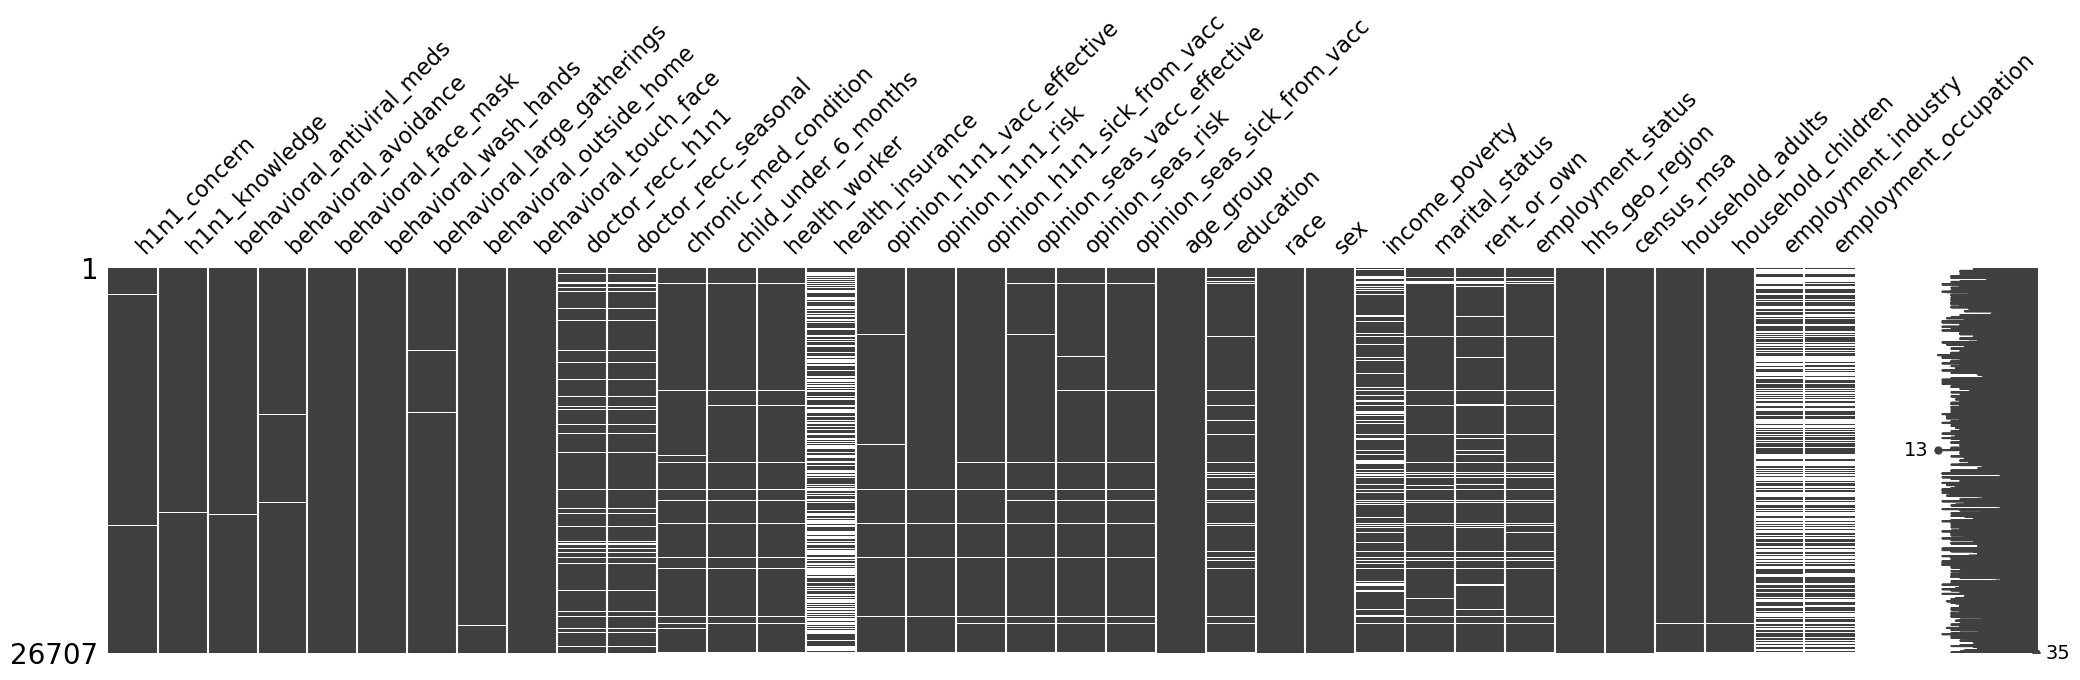

In [2375]:
#Viktoria Stoeva Contribution

#Creating a visual representation of the missing values in the features dataframe
mno.matrix(features, figsize = (25, 5))

A matrix plot has been created, the plot shows missing values as white spaces so the larger the white spaces, the more missing values are present in a given column. 

In this case, we can see that health_insurance, employment_industry and employment_occupation are heavily dispersed with white spaces, indicating the huge number of null values in comparison to other columns. 

We can statistically calculate the percentage below.

In [2327]:
#Daniel Abreu Contribution

#We calculate the percentage of missing values in each column of the features dataframe
missing_data = features.isnull().sum()/len(features)*100

#We sort the series into descending order based on the percentages
missing_data.sort_values(ascending=False)

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

<AxesSubplot: >

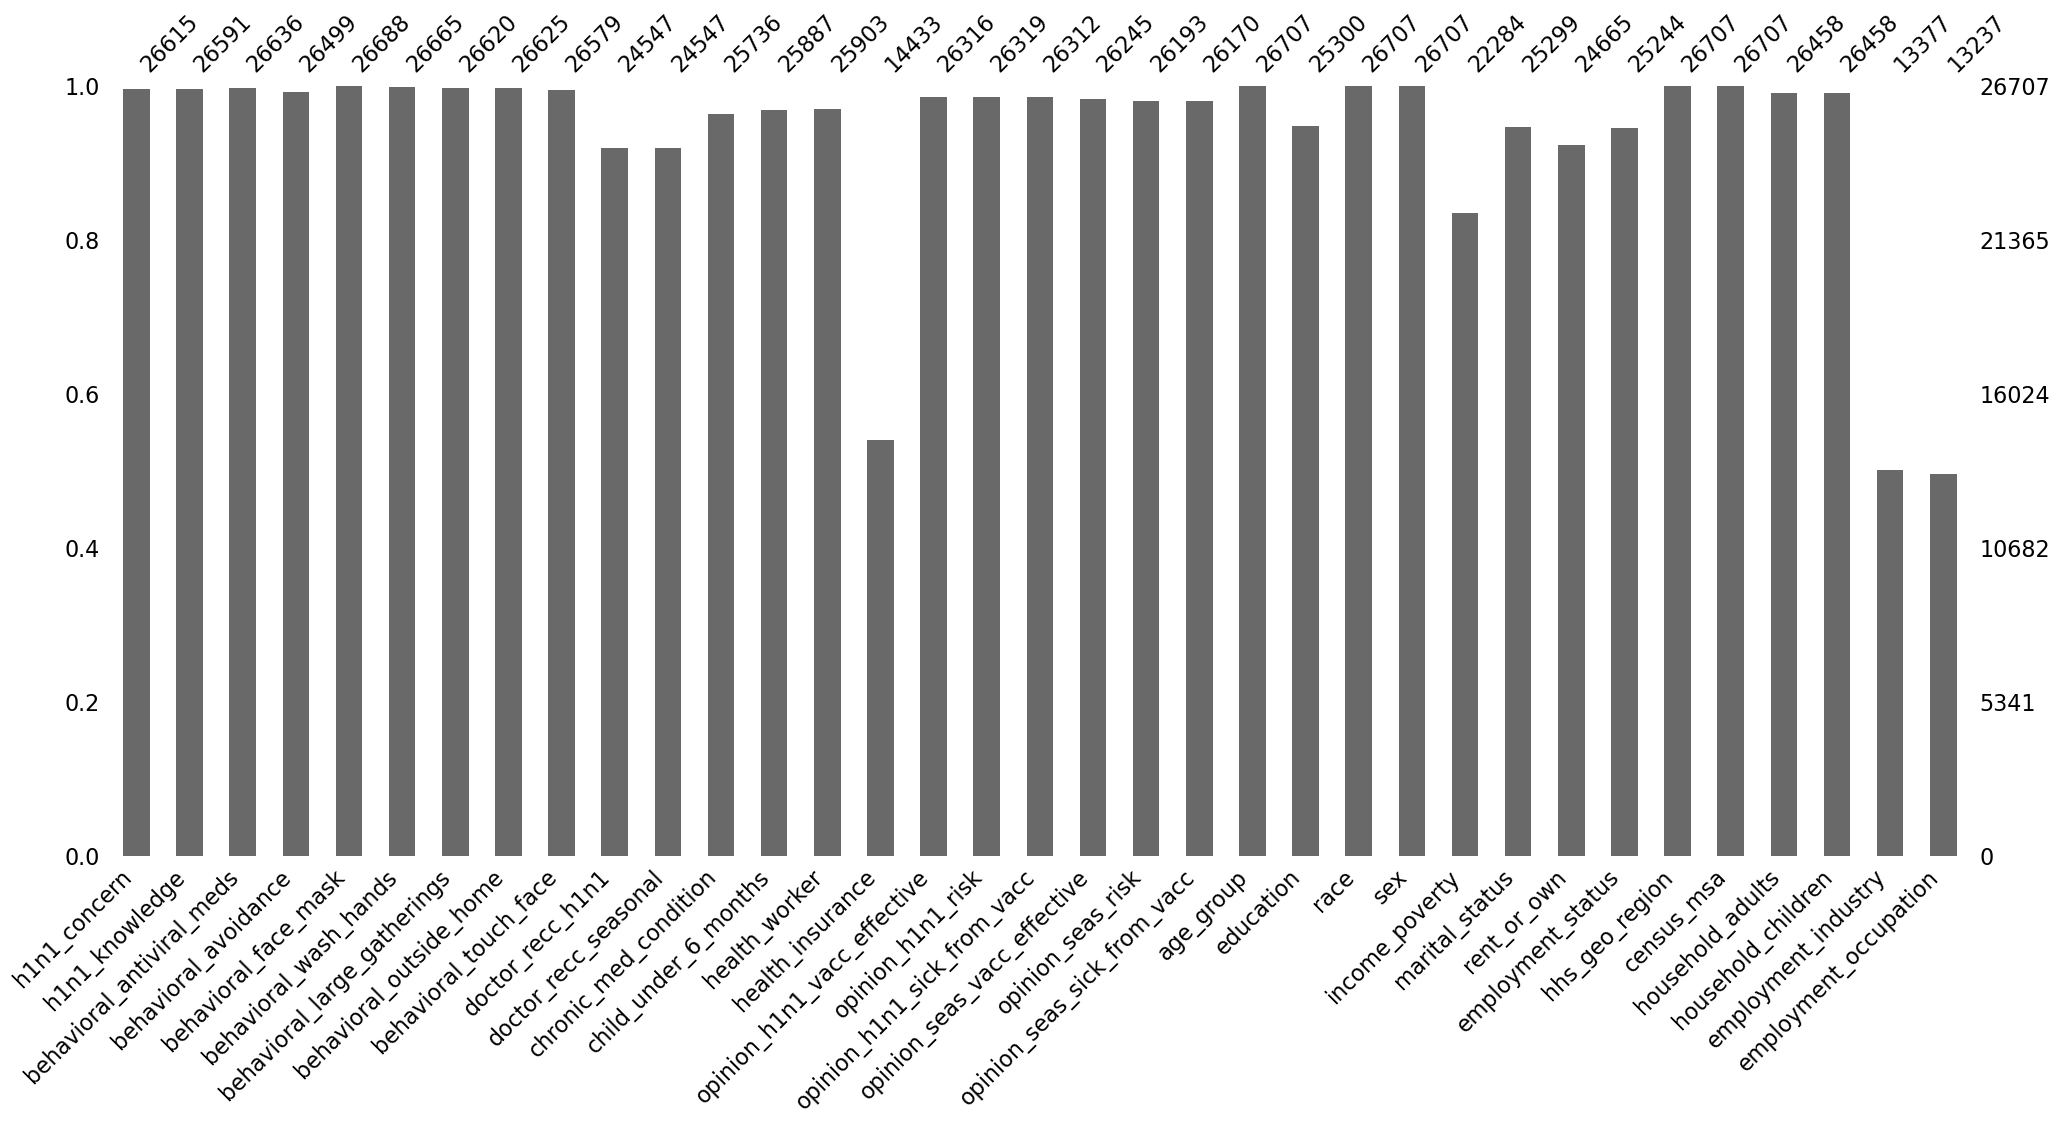

In [2376]:
#Daniel Abreu Contribution

#Creating a bar chart visualization that counts the present values per column

mno.bar(features)

We can see that the following features have over 40% of missing data so we can drop them:
- employment_occupation
- employment_industry
- health_insurance

In [2328]:
#Daniel Abreu and Viktoria Stoeva Contribution

#We drop the features specificed from the original dataframe, and output the first 5 rows to verify that they aren't present 
features.drop(["health_insurance", "employment_industry", "employment_occupation"], axis = 1, inplace = True)
features.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...   race     sex  \
respondent_id                    ...                  
0                           0.0  ...  White  Female   
1                           0.0  ...  White    Male   
2                           NaN  ...  White    Male   
3                           0.0  ...  White  Female   
4                           0.0  ...  White  Female   

                          income_poverty  marital_status  rent_or_own  \
respondent_id                                                           
0                          Below Poverty     Not Married          Own   
1                          Below Poverty     Not Married         Rent   
2              <= $75,000, Above Poverty     Not Married          Own   
3                          Below Poverty     Not Married         Rent   
4              <= $75,000, Above Poverty         Married          Own   

                employment_status  hhs_geo_region                census_msa  \
respondent_id                                                                 
0              Not in Labor Force        oxchjgsf                   Non-MSA   
1                        Employed        bhuqouqj  MSA, Not Principle  City   
2                        Employed        qufhixun  MSA, Not Principle  City   
3              Not in Labor Force        lrircsnp       MSA, Principle City   
4                        Employed        qufhixun  MSA, Not Principle  City   

               household_adults  household_children  
respondent_id                                        
0                           0.0                 0.0  
1                           0.0                 0.0  
2                           2.0                 0.0  
3                           0.0                 0.0  
4                           1.0                 0.0  

[5 rows x 32 columns]

We attempted to train the models with all the features in order as well as different subsets based on the heatmap visualisation and selectkbest, however, we eventually settled to only dropping the manually dropped features as they provided the better performance when not included. 

### Imputation and Encoding pipeline

We will impute and encode the rest of the data using a pipeline

In [2329]:
#Daniel Abreu and Viktoria Stoeva Contribution 

#We assign each feature to its respective type of data for specific imputation strategies created in the pipeline
categorical_columns = [
    'race',
    'sex',
    'marital_status',
    'employment_status',
    'hhs_geo_region',
    'census_msa',
    'rent_or_own',
]


ordinal_numeric_columns = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'household_adults',
    'household_children',
]


ordinal_object_columns = [
    'age_group',
    'education',
    'income_poverty',
]


boolean_columns = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance', 
    'behavioral_face_mask', 
    'behavioral_wash_hands',
    'behavioral_large_gatherings', 
    'behavioral_outside_home',
    'behavioral_touch_face', 
    'doctor_recc_h1n1', 
    'doctor_recc_seasonal',
    'chronic_med_condition', 
    'child_under_6_months', 
    'health_worker',
]


In [2330]:
#Viktoria Stoeva Contribution

# Preprocessing pipeline for categorical_columns
# This step applies one-hot encoding to the categorical features where each column represents a unique category
# The sparse_output parameter ensures that the encoded data is in a dense matrix format
category_preprocessor = make_pipeline(
    OneHotEncoder(drop='first', sparse_output=False), 
)

# Preprocessing pipeline for ordinal and object features
# This step performs ordinal encoding, which assigns unique integer values to each category within ordinal or object features.
# This encoding preserves the order of the categories.
# This step also handles missing values in the encoded features. It replaces missing values with a constant value of -1
# By using -1 as a fill value, we preserserve the data and ensure that we avoid bias for the ordinal_object_columns
ordinal_object_preprocessor = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='constant', fill_value = -1),
)


In [2331]:
#Daniel Abreu Contribution

# Creating the default data preprocessing pipeline by combining the two previous pipelines
default_preprocessor = ColumnTransformer(
    transformers=[
        ('boolean_imputer', SimpleImputer(strategy='most_frequent'), boolean_columns),
        ('ordinal_numeric_imputer', SimpleImputer(strategy='median'), ordinal_numeric_columns),
        ('ordinal_object_preprocessor', ordinal_object_preprocessor, ordinal_object_columns),
        ('category_preprocessor', category_preprocessor, categorical_columns),
        
    ],
    remainder='passthrough'
)
# The remainder parameter specifies that any remaining columns in the dataset that were not explicitly mentioned
# in the transformations should be passed through without any transformations.
default_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('boolean_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral_touch_face', 'doctor_recc_h1n1',
                                  'doctor_recc_seasonal',
                                  'chronic_med_c...
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder()),
                                                 ('simpleimputer',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant'))]),
                                 ['age_group', 'education', 'income_poverty']),
                                ('category_preprocessor',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['race', 'sex', 'marital_status',
                                  'employment_status', 'hhs_geo_region',
                                  'census_msa', 'rent_or_own'])])

The default_preprocessor pipeline can now be used in conjunction with the models created after visualisation to preprocess the data and apply the spefcified transoformations to the data before feeding it into the models for tranining and prediction.

#### Old Code for impuation and encoding

In [2332]:
"""
#Assigning nominal data to a list
nominals = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
             'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
               'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',
                 'child_under_6_months', 'health_worker', 'race', 'sex', 'marital_status',
                   'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']


#Assigning ordinal data to a list
ordinals = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
             'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
               'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty', 'household_adults', 'household_children']
"""

"\n#Assigning nominal data to a list\nnominals = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',\n             'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',\n               'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition',\n                 'child_under_6_months', 'health_worker', 'race', 'sex', 'marital_status',\n                   'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']\n\n\n#Assigning ordinal data to a list\nordinals = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',\n             'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',\n               'opinion_seas_sick_from_vacc', 'age_group', 'education', 'income_poverty', 'household_adults', 'household_children']\n"

In [2333]:
"""
#We create a transformer that applies one hot encoding to our nominal values while it also standarises and imputes missing data using the median strategy
col_transformer = make_column_transformer(
    (OneHotEncoder(), nominals),
    (make_pipeline(OrdinalEncoder(), StandardScaler(), SimpleImputer(strategy='median', add_indicator=True)), ordinals))

col_transformer
"""

"\n#We create a transformer that applies one hot encoding to our nominal values while it also standarises and imputes missing data using the median strategy\ncol_transformer = make_column_transformer(\n    (OneHotEncoder(), nominals),\n    (make_pipeline(OrdinalEncoder(), StandardScaler(), SimpleImputer(strategy='median', add_indicator=True)), ordinals))\n\ncol_transformer\n"

In [2334]:
"""
#Assigning the numerical data to a variable
numeric = features.select_dtypes(exclude="object").columns
"""

'\n#Assigning the numerical data to a variable\nnumeric = features.select_dtypes(exclude="object").columns\n'

In [2335]:

"""
##Imputation of the Numerical Data using median
for column in numeric:
    features[column].fillna(features[column].median(), inplace= True)
"""

'\n##Imputation of the Numerical Data using median\nfor column in numeric:\n    features[column].fillna(features[column].median(), inplace= True)\n'

In [2336]:
"""
#In order to use the knn imputer, the data should be normalised to avoid biased replacements
#This is due to the knn imputation being distance-based
scaler = MinMaxScaler()
numeric_data = pd.DataFrame(scaler.fit_transform(numeric), columns = numeric.columns)
numeric_data.head()
"""

'\n#In order to use the knn imputer, the data should be normalised to avoid biased replacements\n#This is due to the knn imputation being distance-based\nscaler = MinMaxScaler()\nnumeric_data = pd.DataFrame(scaler.fit_transform(numeric), columns = numeric.columns)\nnumeric_data.head()\n'

In [2337]:
"""
##Imputation of the Numerical Data using knn
knn_imputer = knnImputer(n_neighbors=5)

for column in numeric:
    features[column];knn_imputer.fit_transform(numeric_data)
"""

'\n##Imputation of the Numerical Data using knn\nknn_imputer = knnImputer(n_neighbors=5)\n\nfor column in numeric:\n    features[column];knn_imputer.fit_transform(numeric_data)\n'

In [2338]:
"""
missing_data = features.isnull().sum()/len(features)*100
missing_data.sort_values(ascending=False)

#We've now replaced the numerical data missing data with the means of the K-nearest Neighbor values
"""

"\nmissing_data = features.isnull().sum()/len(features)*100\nmissing_data.sort_values(ascending=False)\n\n#We've now replaced the numerical data missing data with the means of the K-nearest Neighbor values\n"

## Visualization

### Checking if the dataset is balanced

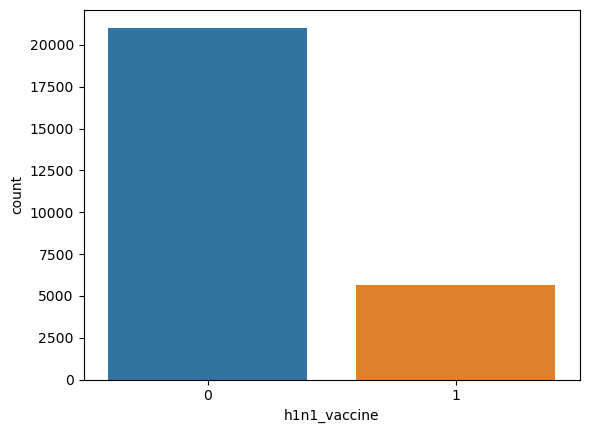

In [2339]:
#Daniel Abreu Contribution

# Create a count plot to visualize the distribution of h1n1_vaccine values
sns.countplot(x="h1n1_vaccine", data=labels);

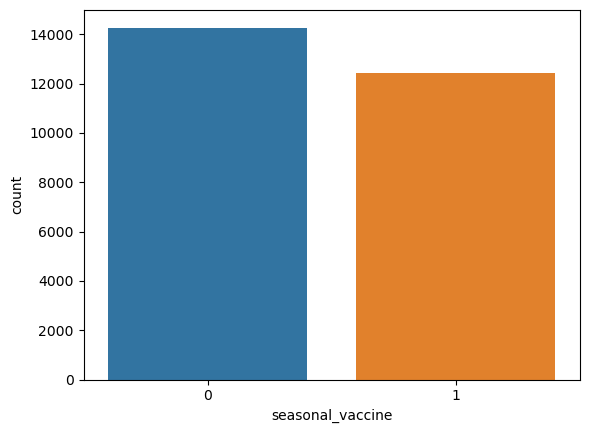

In [2340]:
#Daniel Abreu Contribution

# Create a count plot to visualize the distribution of seasonal_vaccine values
sns.countplot(x="seasonal_vaccine", data=labels);

We can note that most people were not worried about the risk of H1N1

### Distribution Graphs

In [2341]:
#Daniel Abreu and Viktoria Stoeva Contribution

# Combine the features and labels dataframes into a new dataframe
combined_df = features.join(labels)

# Display the first few rows of the combined dataframe
combined_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   

               marital_status  rent_or_own   employment_status  \
respondent_id                                                    
0                 Not Married          Own  Not in Labor Force   
1                 Not Married         Rent            Employed   
2                 Not Married          Own            Employed   
3                 Not Married         Rent  Not in Labor Force   
4                     Married          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  h1n1_vaccine  seasonal_vaccine  
respondent_id                                                      
0                             0.0             0                 0  
1                             0.0             0                 1  
2                             0.0             0                 0  
3                             0.0             0                 1  
4                             0.0             0                 0  

[5 rows x 34 columns]

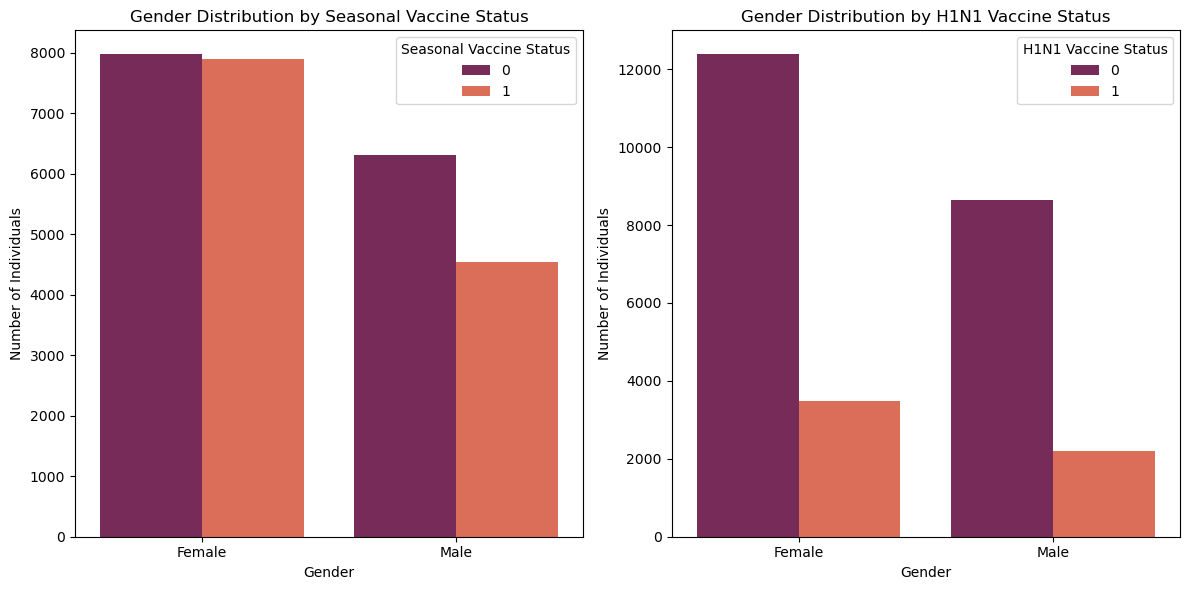

In [2342]:
#Daniel Abreu and Viktoria Stoeva Contribution

# Group the data by gender and vaccination status for seasonal vaccine
seasonal_vaccine = combined_df.groupby(['sex', 'seasonal_vaccine']).size().unstack(fill_value=0)

# Reset the index of the grouped dataframe
seasonal_vaccine = seasonal_vaccine.reset_index()

# Melting the dataframe to make it suitable for visualization
melted_seasonal = pd.melt(seasonal_vaccine, id_vars=['sex'], var_name='vaccine_status', value_name='count')

# Group the data by gender and vaccination status for H1N1 vaccine
h1n1_vaccine = combined_df.groupby(['sex', 'h1n1_vaccine']).size().unstack(fill_value=0)

# Reset the index of the grouped dataframe
h1n1_vaccine = h1n1_vaccine.reset_index()

# Melt the dataframe to make it suitable for visualization
melted_h1n1 = pd.melt(h1n1_vaccine, id_vars=['sex'], var_name='vaccine_status', value_name='count')

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Create a stacked bar chart to visualize the distribution of gender by vaccination status for seasonal vaccine
sns.barplot(x='sex', y='count', hue='vaccine_status', data=melted_seasonal, palette='rocket', ax=axs[0])

# Set the chart title and axis labels
axs[0].set_title('Gender Distribution by Seasonal Vaccine Status')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Number of Individuals')

# Add a legend to the chart
axs[0].legend(title='Seasonal Vaccine Status')

# Create a stacked bar chart to visualize the distribution of gender by vaccination status for H1N1 vaccine
sns.barplot(x='sex', y='count', hue='vaccine_status', data=melted_h1n1, palette='rocket', ax=axs[1])

# Set the chart title and axis labels
axs[1].set_title('Gender Distribution by H1N1 Vaccine Status')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Individuals')

# Add a legend to the chart
axs[1].legend(title='H1N1 Vaccine Status')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the chart
plt.show()

<AxesSubplot: title={'center': 'Stacked bar plot of genders accepting and refusing the H1N1 vaccine'}, xlabel='h1n1_vaccine'>

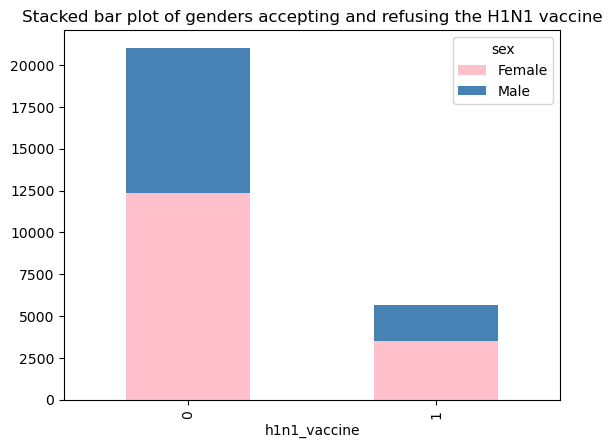

In [2343]:
#Viktoria Stoeva Contribution

#Creating a stacked bar chart for the vaccines to show the acceptance and refusal for the vaccine rather than by gender
combined_df.groupby(['h1n1_vaccine', 'sex']).size().unstack().plot(kind='bar', stacked=True, color=['pink','steelblue'], title='Stacked bar plot of genders accepting and refusing the H1N1 vaccine')

<AxesSubplot: title={'center': 'Stacked bar plot of genders accepting and refusing the Seasonal Flu vaccine'}, xlabel='seasonal_vaccine'>

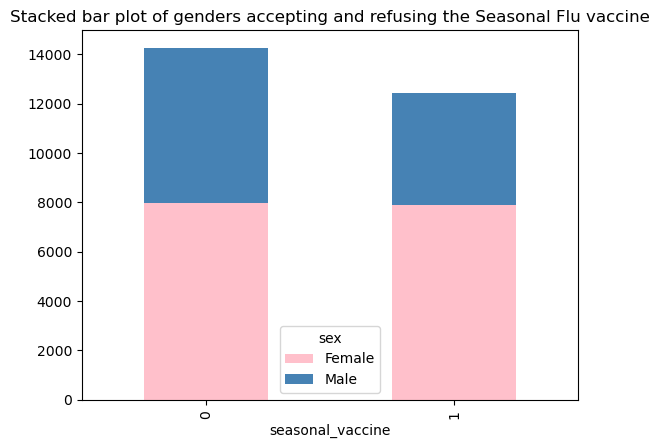

In [2344]:
#Viktoria Stoeva Contribution

# Create a stacked bar plot showing the count of genders accepting and refusing the Seasonal Flu vaccine
combined_df.groupby(['seasonal_vaccine', 'sex']).size().unstack().plot(kind='bar', stacked=True, color=['pink','steelblue'], 
title='Stacked bar plot of genders accepting and refusing the Seasonal Flu vaccine')

From the 3 bar charts above we can conclude that the Seasonal Vaccine is accepted more often than the H1N1 vaccine. Another conclusion is that women tend to accept both vaccines more often than men.

In [2345]:
#Daniel Abreu and Viktoria Stoeva Contribution

"""
The function bellow is a visualisation technique gathered from the driven data article
regarding the same dataset @https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/
"""
def vaccination_rate_plot(col, target, combined_df, ax=None):
    counts = (combined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

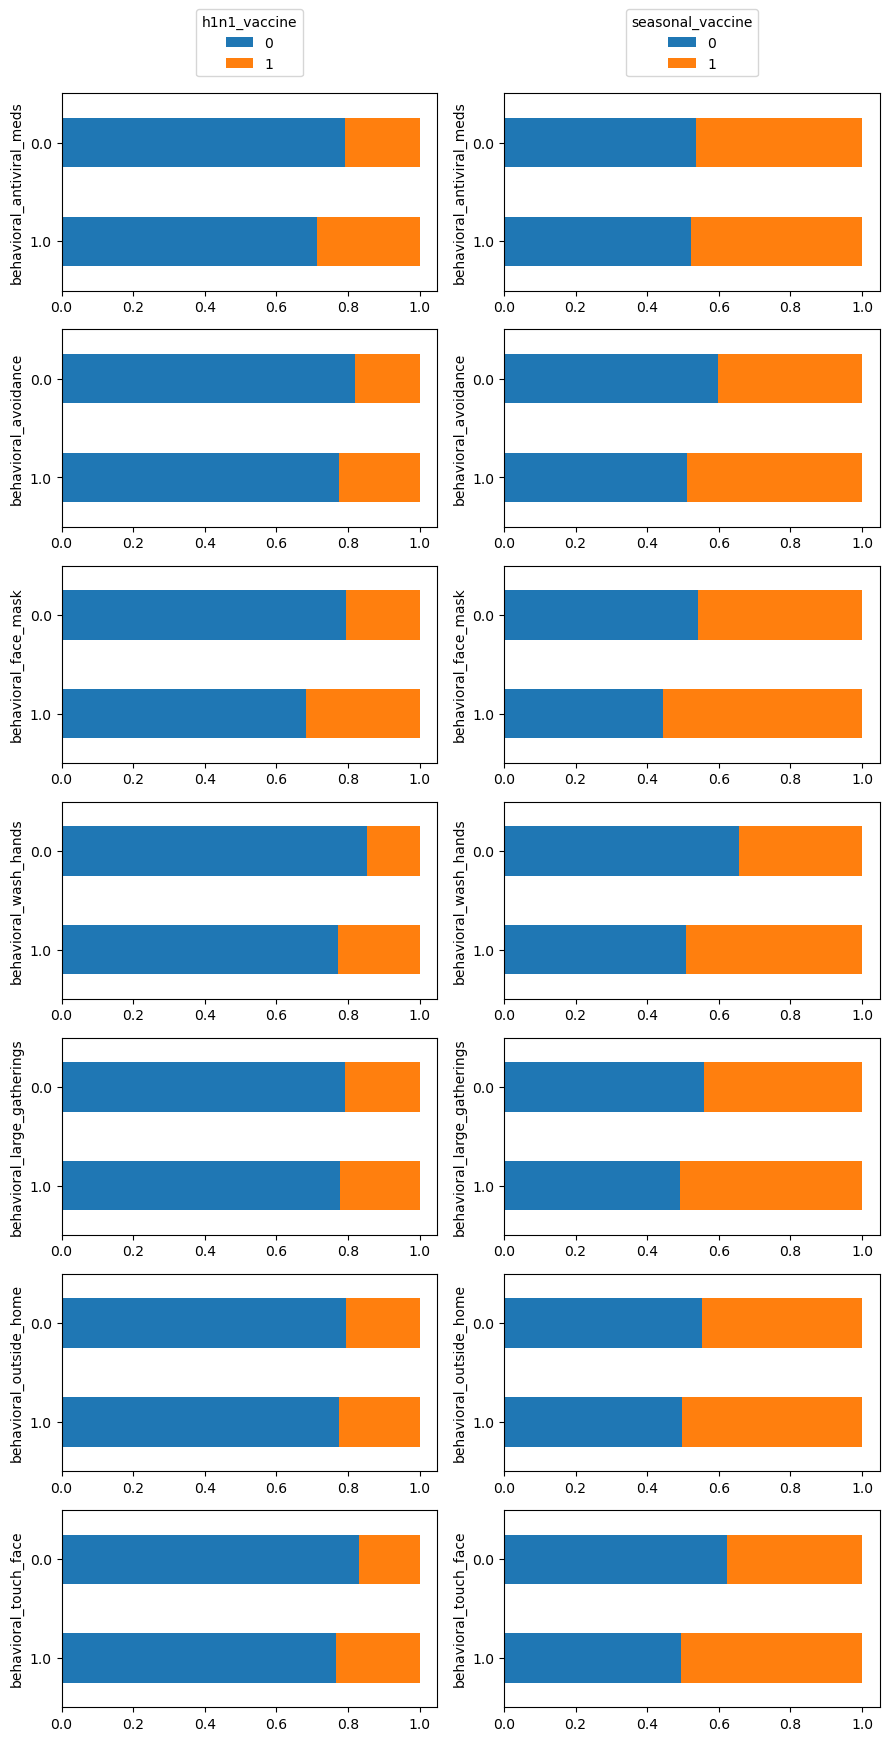

In [2346]:
#Daniel Abreu and Viktoria Stoeva Contribution

"""
The function bellow is a visualisation technique gathered from the driven data article
regarding the same dataset @https://drivendata.co/blog/predict-flu-vaccine-data-benchmark/
"""
columns_to_plot = ["behavioral_antiviral_meds",
                    "behavioral_avoidance",
                    "behavioral_face_mask",
                    "behavioral_wash_hands",
                    "behavioral_large_gatherings",
                    "behavioral_outside_home",
                    "behavioral_touch_face"]       

fig, ax = plt.subplots(
    len(columns_to_plot), 2, figsize=(9,len(columns_to_plot)*2.5)
)
for idx, col in enumerate(columns_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', combined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', combined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

In [2347]:
#Viktoria Stoeva Contribution

slices_to_plot = np.array(features[["behavioral_antiviral_meds",
                    "behavioral_avoidance",
                    "behavioral_face_mask",
                    "behavioral_wash_hands",
                    "behavioral_large_gatherings",
                    "behavioral_outside_home",
                    "behavioral_touch_face"]].sum())

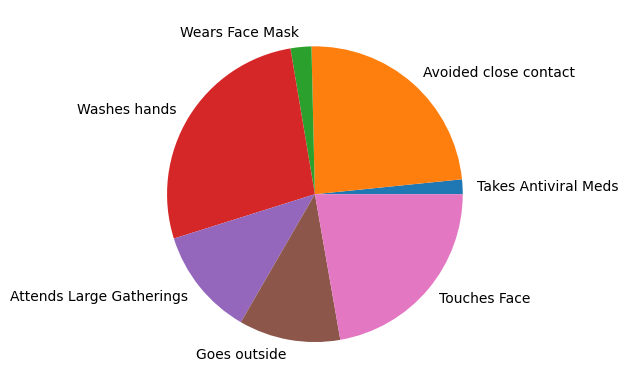

In [2348]:
#Viktoria Stoeva Contribution

# Define a list of behavioral features
behavioral_slices = ["Takes Antiviral Meds", "Avoided close contact", "Wears Face Mask", "Washes hands", "Attends Large Gatherings", "Goes outside", "Touches Face"]

# Create a pie chart to visualize the distribution of slices
plt.pie(slices_to_plot, labels = behavioral_slices)

#Displays the pie chart
plt.show()

### Visualising outliers

In [2349]:
#Daniel Abreu Contribution

def find_outliers_IQR(features):
# Calculate the first quartile (Q1)
   q1=features.quantile(0.25)
# Calculate the third quartile (Q3)
   q3=features.quantile(0.75)
# Calculate the Interquartile Range (IQR)
   IQR=q3-q1
# Identify outliers based on the IQR range
   outliers = features[((features<(q1-1.5*IQR)) | (features>(q3+1.5*IQR)))]
# Return the outliers
   return outliers

In [2350]:
#Daniel Abreu Contribution

# Identify outliers using the find_outliers_IQR() function and assign them to the 'outliers' variable
outliers = find_outliers_IQR(features)

# Print the number of outliers by converting the length of the 'outliers' variable to a string
print("number of outliers:" + str(len(outliers)))

# Print the maximum value among the outliers by converting it to a string
print("max outlier value:" + str(outliers.max()))

# Print the minimum value among the outliers by converting it to a string
print("min outlier value:" + str(outliers.min()))

# Display the outliers
outliers

C:\Users\danie\AppData\Local\Temp\ipykernel_28068\10365664.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=features.quantile(0.25)
C:\Users\danie\AppData\Local\Temp\ipykernel_28068\10365664.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=features.quantile(0.75)
C:\Users\danie\AppData\Local\Temp\ipykernel_28068\10365664.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = features[((features<(q1-1.5*IQR)) | (features>(q3+1.5*IQR)))]


number of outliers:26707
max outlier value:h1n1_concern                    NaN
h1n1_knowledge                  NaN
behavioral_antiviral_meds       1.0
behavioral_avoidance            NaN
behavioral_face_mask            1.0
behavioral_wash_hands           0.0
behavioral_large_gatherings     NaN
behavioral_outside_home         NaN
behavioral_touch_face           NaN
doctor_recc_h1n1                1.0
doctor_recc_seasonal            NaN
chronic_med_condition           NaN
child_under_6_months            1.0
health_worker                   1.0
opinion_h1n1_vacc_effective     NaN
opinion_h1n1_risk               NaN
opinion_h1n1_sick_from_vacc     NaN
opinion_seas_vacc_effective     2.0
opinion_seas_risk               NaN
opinion_seas_sick_from_vacc     NaN
age_group                      None
education                      None
race                           None
sex                            None
income_poverty                 None
marital_status                 None
rent_or_own          

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       NaN             NaN                        NaN   
1                       NaN             NaN                        NaN   
2                       NaN             NaN                        NaN   
3                       NaN             NaN                        NaN   
4                       NaN             NaN                        NaN   
...                     ...             ...                        ...   
26702                   NaN             NaN                        NaN   
26703                   NaN             NaN                        NaN   
26704                   NaN             NaN                        NaN   
26705                   NaN             NaN                        NaN   
26706                   NaN             NaN                        NaN   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   
...                             ...                   ...   
26702                           NaN                   NaN   
26703                           NaN                   NaN   
26704                           NaN                   1.0   
26705                           NaN                   NaN   
26706                           NaN                   NaN   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          NaN   
1                                NaN                          NaN   
2                                0.0                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
26702                            0.0                          NaN   
26703                            NaN                          NaN   
26704                            NaN                          NaN   
26705                            0.0                          NaN   
26706                            0.0                          NaN   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  NaN                    NaN   
1                                  NaN                    NaN   
2                                  NaN                    NaN   
3                                  NaN                    NaN   
4                                  NaN                    NaN   
...                                ...                    ...   
26702                              NaN                    NaN   
26703                              NaN                    NaN   
26704                              NaN                    NaN   
26705                              NaN                    NaN   
26706                              NaN                    NaN   

               doctor_recc_h1n1  ...  race  sex  income_poverty  \
respondent_id                    ...                              
0                           NaN  ...   NaN  NaN             NaN   
1                           NaN  ...   NaN  NaN             NaN   
2                           NaN  ...   NaN  NaN             NaN   
3                           NaN  ...   NaN  NaN             NaN   
4                           NaN  ...   NaN  NaN             NaN   
...                         ...  ...   ...  .

<AxesSubplot: >

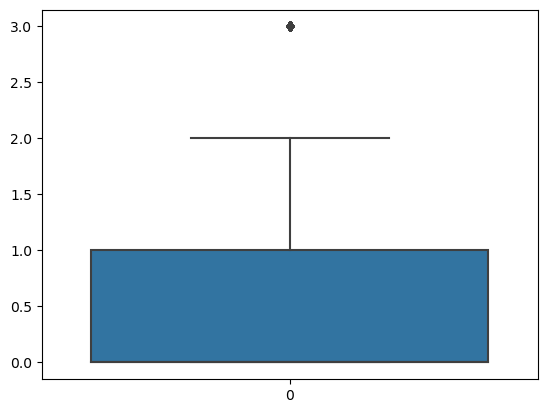

In [2351]:
#Daniel Abreu Contribution

# Create a box plot of the "household_children" column to visualise the outliers
sns.boxplot(features.household_children)

<AxesSubplot: xlabel='household_children', ylabel='count'>

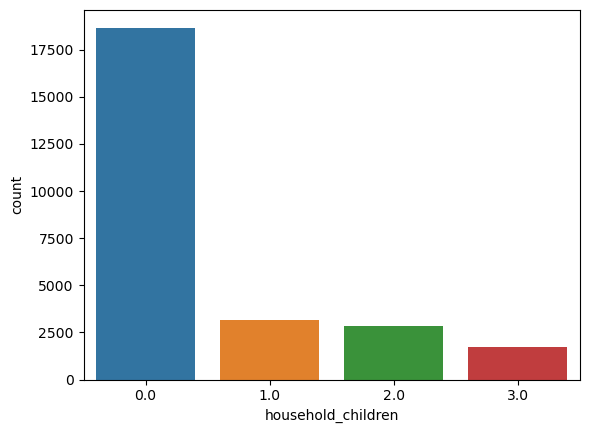

In [2352]:
#Daniel Abreu Contribution

# Create a count plot of the "household_children" column to visualise the outliers
sns.countplot(x=combined_df["household_children"])

<AxesSubplot: >

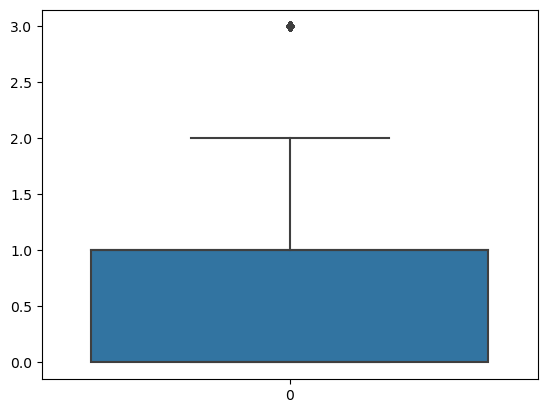

In [2353]:
#Daniel Abreu Contribution

# Create a box plot of the "household_adults" column to visualise the outliers
sns.boxplot(features.household_adults)

<AxesSubplot: xlabel='household_adults', ylabel='count'>

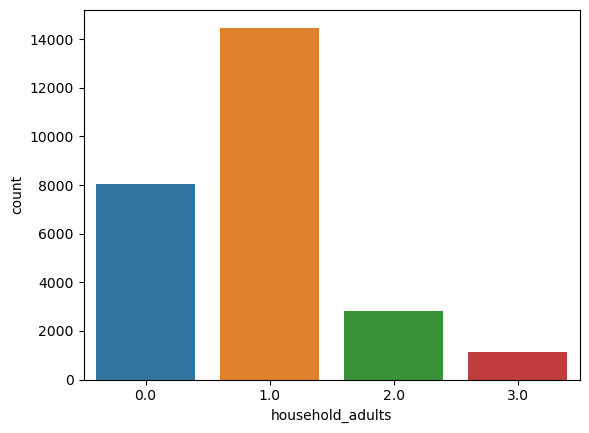

In [2354]:
#Daniel Abreu Contribution

# Create a count plot based on the "household_adults" column in the "combined_df" dataframe to visualise the outliers
sns.countplot(x=combined_df["household_adults"])

The outliers seem to be missrepresented data so we decide not to remove them as that would lower the accuracy when dealing with unseen data

### Correlation

In [2355]:
#Daniel Abreu and Viktoria Stoeva Contribution

#Correlation of features to H1N1
features.corrwith(labels.h1n1_vaccine)

C:\Users\danie\AppData\Local\Temp\ipykernel_28068\1831096868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corrwith(labels.h1n1_vaccine)


h1n1_concern                   0.121929
h1n1_knowledge                 0.117951
behavioral_antiviral_meds      0.040608
behavioral_avoidance           0.047690
behavioral_face_mask           0.070498
behavioral_wash_hands          0.074712
behavioral_large_gatherings    0.017822
behavioral_outside_home        0.021768
behavioral_touch_face          0.071648
doctor_recc_h1n1               0.393890
doctor_recc_seasonal           0.209864
chronic_med_condition          0.095207
child_under_6_months           0.066962
health_worker                  0.169768
opinion_h1n1_vacc_effective    0.269347
opinion_h1n1_risk              0.323265
opinion_h1n1_sick_from_vacc    0.075091
opinion_seas_vacc_effective    0.179272
opinion_seas_risk              0.258571
opinion_seas_sick_from_vacc    0.008360
household_adults               0.007545
household_children            -0.003320
dtype: float64

In [2356]:
#Daniel Abreu and Viktoria Stoeva Contribution

# Calculate the correlation between each column in the "features" dataframe and the "seasonal_vaccine" column in the "labels" dataframe
features.corrwith(labels.seasonal_vaccine)

C:\Users\danie\AppData\Local\Temp\ipykernel_28068\3898612758.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corrwith(labels.seasonal_vaccine)


h1n1_concern                   0.154828
h1n1_knowledge                 0.120152
behavioral_antiviral_meds      0.006277
behavioral_avoidance           0.076395
behavioral_face_mask           0.050083
behavioral_wash_hands          0.112414
behavioral_large_gatherings    0.064025
behavioral_outside_home        0.053509
behavioral_touch_face          0.120228
doctor_recc_h1n1               0.198607
doctor_recc_seasonal           0.369190
chronic_med_condition          0.170174
child_under_6_months           0.012097
health_worker                  0.127311
opinion_h1n1_vacc_effective    0.205072
opinion_h1n1_risk              0.216625
opinion_h1n1_sick_from_vacc    0.027404
opinion_seas_vacc_effective    0.361875
opinion_seas_risk              0.390106
opinion_seas_sick_from_vacc   -0.061510
household_adults              -0.064840
household_children            -0.114614
dtype: float64

C:\Users\danie\AppData\Local\Temp\ipykernel_28068\578989161.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = combined_df.corr()


<AxesSubplot: >

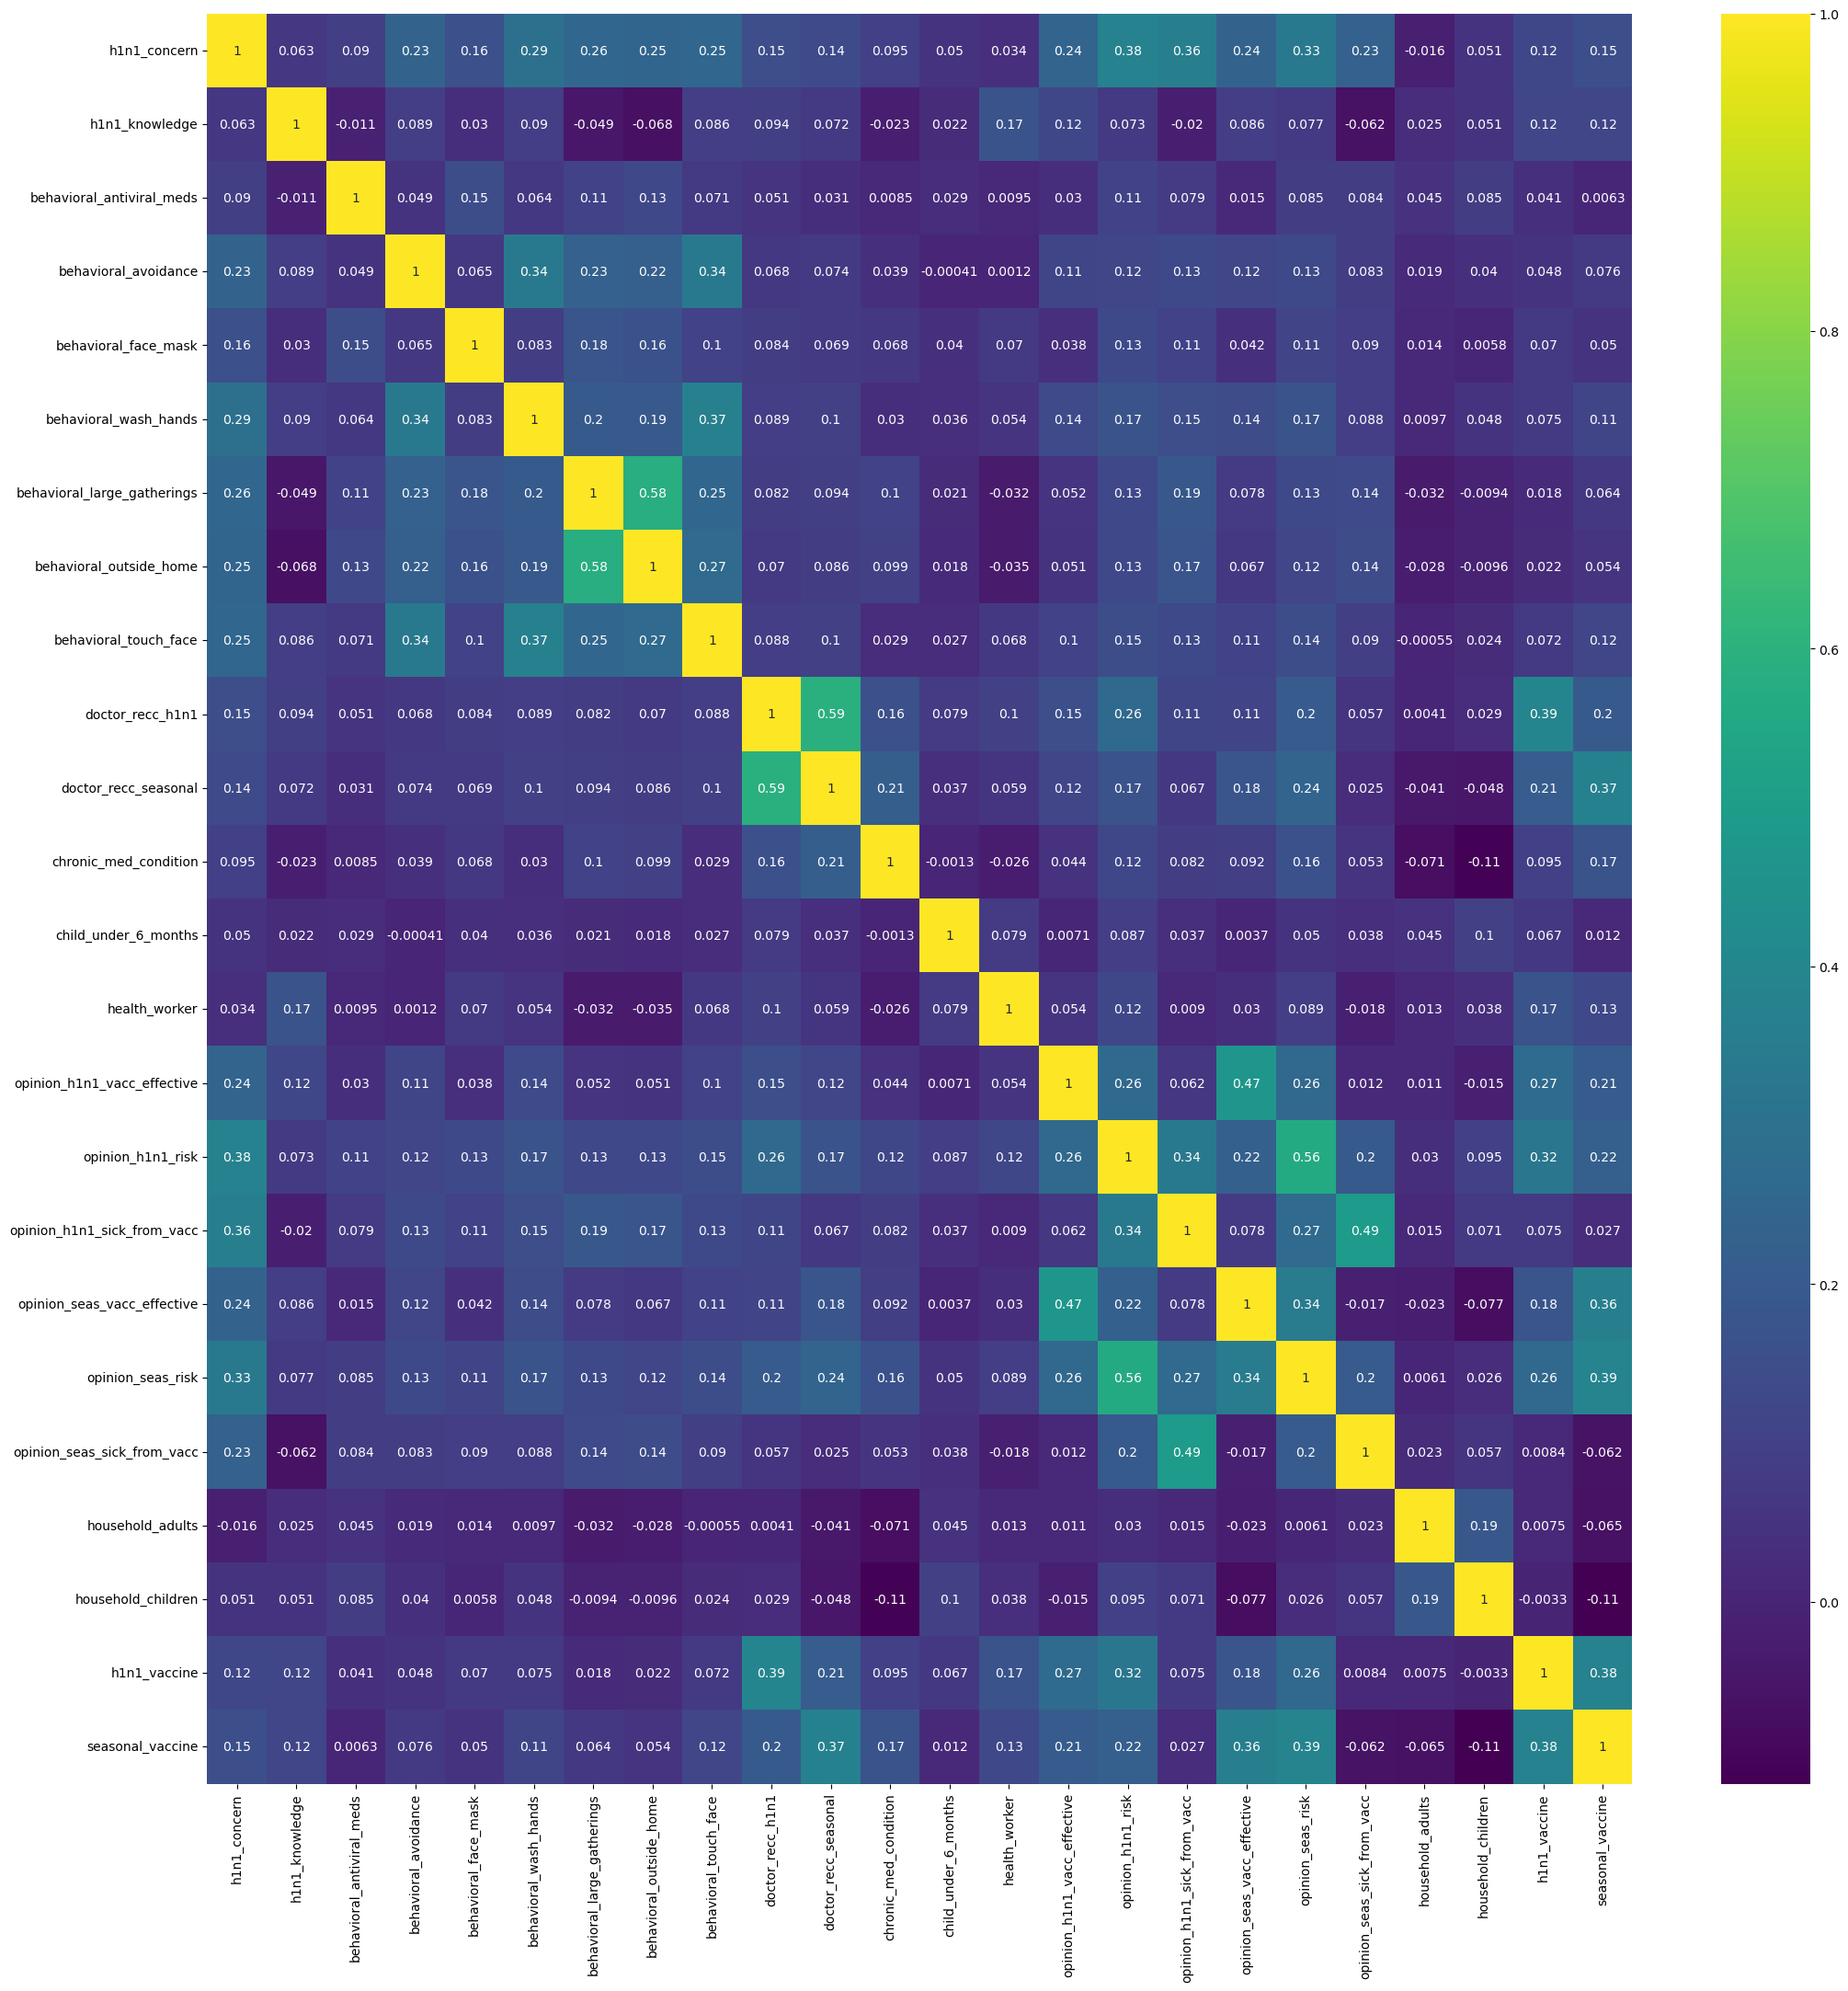

In [2357]:
#Daniel Abreu and Viktoria Stoeva Contribution

#We use the combined dataframe to visualise the correlation between the features using a heatmap
corrmat = combined_df.corr()
correlation_features = corrmat.index
plt.figure(figsize=(25,25))

sns.heatmap(combined_df[correlation_features].corr(), annot=True, cmap="viridis")

Out of the behavioral ones, wearing a face mask seems to provide the highest correlation with both vaccines, behavioral_wash_hands and behavioral_touch_face seem to have a higher correlation with the seasonal_vaccine results than the h1n1 one. The other behavioral features have a correlation close to 0 with the vaccine acceptance/refusal.

The vaccines seem to have a relatively high correlation with each other. The doctor_recc_h1n1, doctor_recc_seasonal opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_seas_vacc_effective, opinion_seas_risk seem to have a noticable influence on the vaccination outcome too. 

Most of the other features seem to have an important correlation with only one of the vaccines.

<AxesSubplot: >

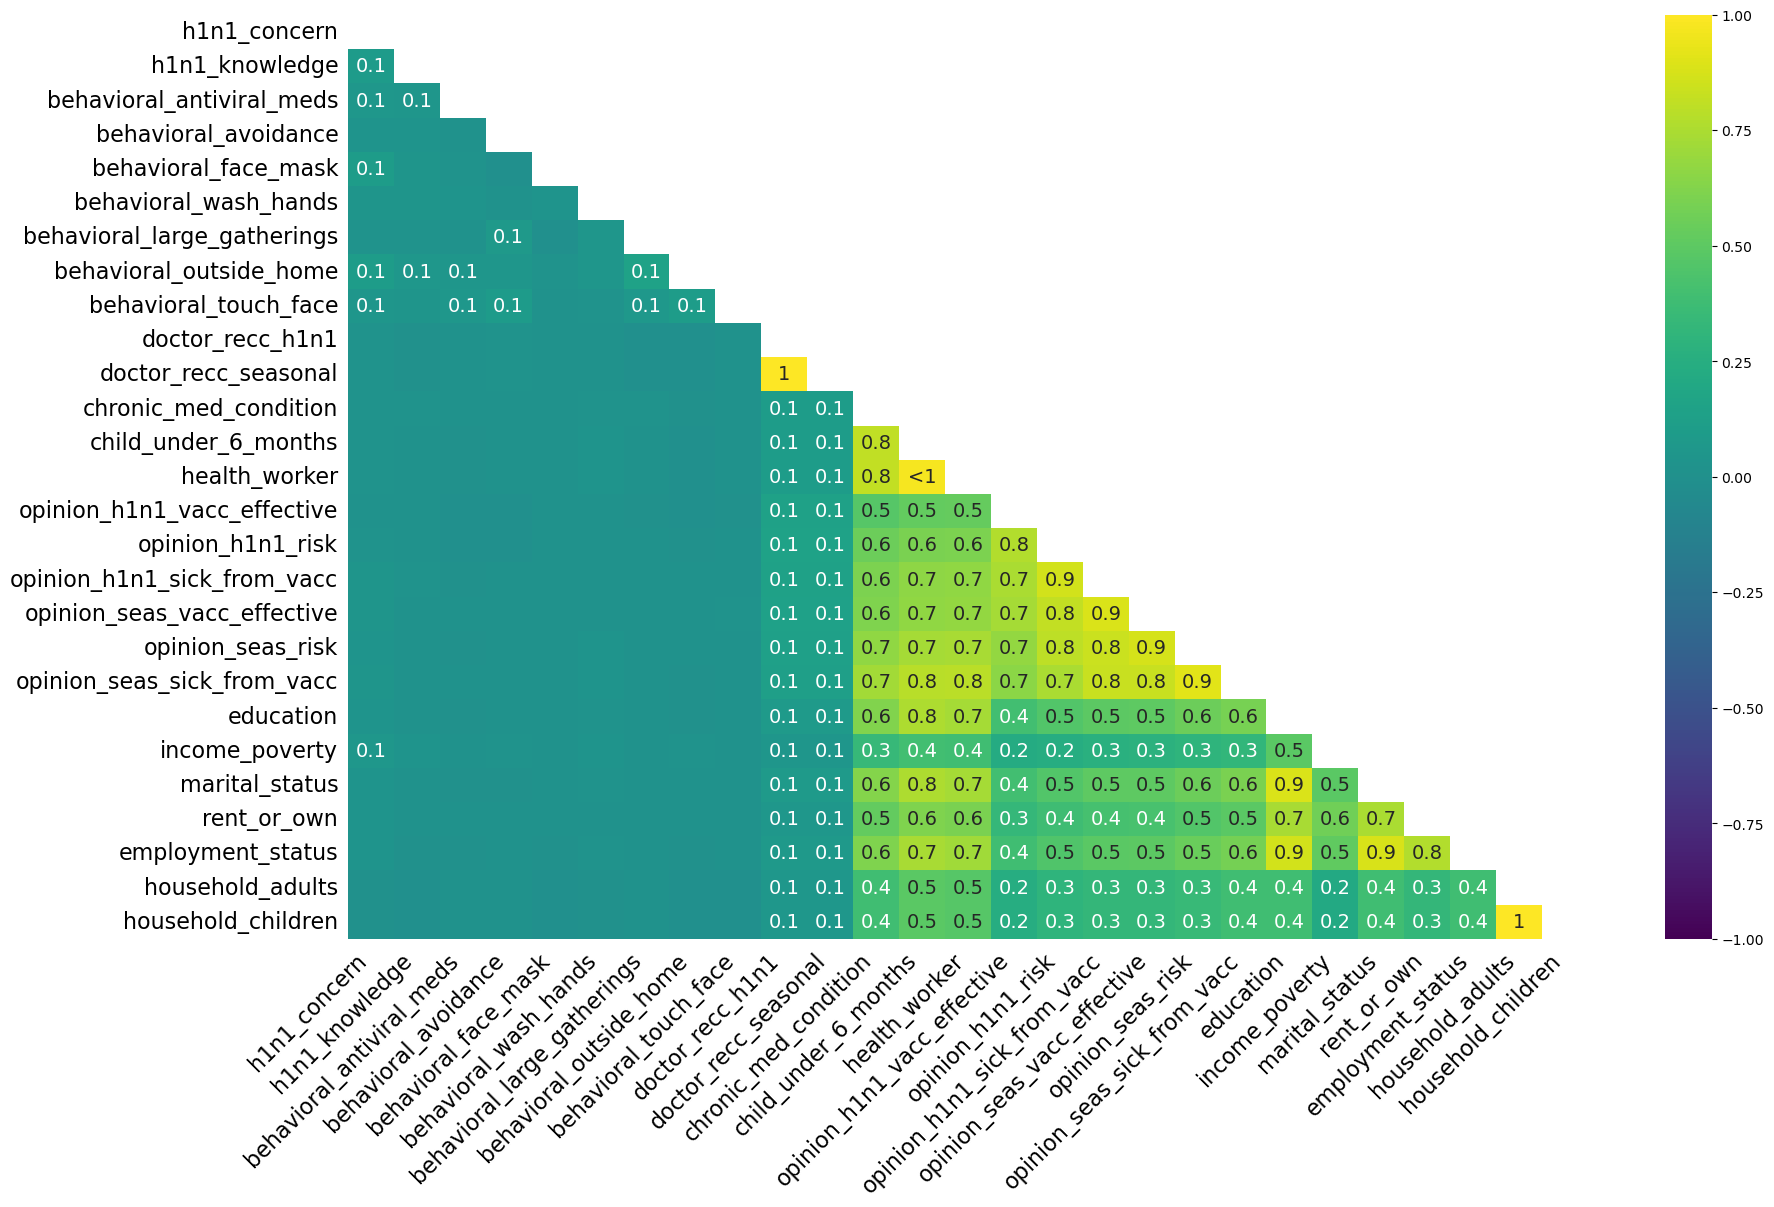

In [2269]:
#Daniel Abreu and Viktoria Stoeva Contribution

# heatmap to measure how strongly the presence or absence of a variable affects the presence of another variable
mno.heatmap(combined_df, cmap='viridis')

There seems to be a strong relationship between doctors recommending the h1n1 vaccine and the seasonal vaccine, another strong relationship is between the number of household adults and household children. Their marital status and education and employment status seem to have a relatively strong relationship. 

Another discovery is that there is a strong relationship between a person's opinion on the risks of the disease and the effectiveness of the vaccine.

The behavioral features don't seem to affect the results for the other features much neither positively nor negatively.

<AxesSubplot: >

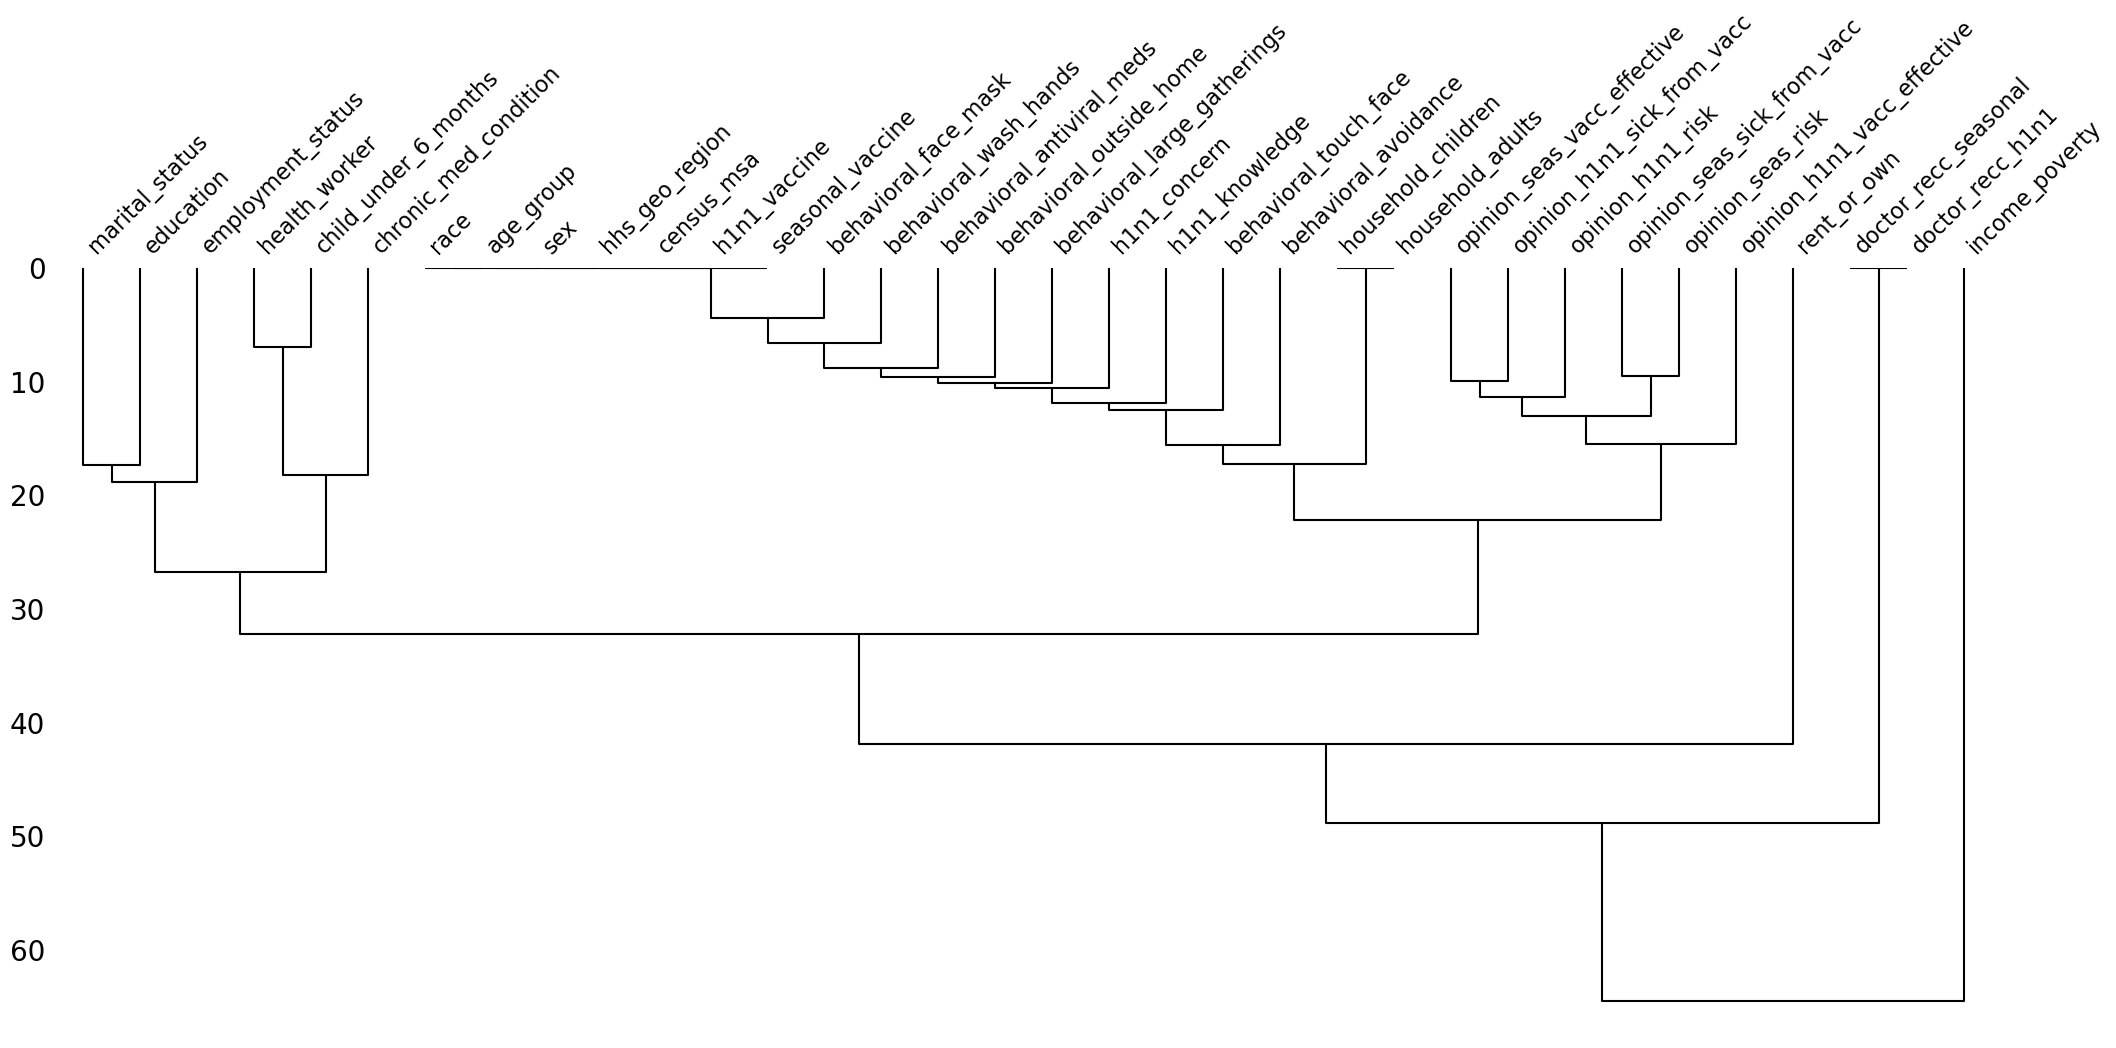

In [2166]:
#Viktoria Stoeva Contribution

#Create a dendrogram to show more in depth connections between features
mno.dendrogram(combined_df)

Here a top-down approach is used to make conclusions on the clustered variables using a dendogram. A dendrogram is a diagram that represents the hierarchical clustering of data points.

This allows for a detailed understanding of the connections between features in the dataset. Each feature will be represented as a node in the dendrogram, and the structure of the dendrogram will show the relationships and similarities between these features.

The behaviours are related with each other, similarly people's opinions on the disease and vaccines are related. Their personal choices about family, education and employment are a different cluster. 

The flat line indicates that the data points or clusters are not forming distinct groups or subgroups based on their similarity or dissimilarity. It implies that there is no clear hierarchical structure or evident clustering pattern between the features, in this case, race, age_group, sex, region and census.

## Cross Tabulation

We will analyse which features may assist in the prediction of vaccination decision. 
We will begin by evaluating all the behavioural related variables below: 

- behavioral_antiviral_meds      
- behavioral_avoidance           
- behavioral_face_mask           
- behavioral_wash_hands          
- behavioral_large_gatherings    
- behavioral_outside_home        
- behavioral_touch_face

The data is binary.

In [2270]:
#Daniel Abreu and Viktoria Stoeva Contribution

# Function to calculate a cross-tabulation between two variables and normalize the result by columns

def crosstab(x, y):

    return pd.crosstab(x, y, normalize='columns')*100

In [2168]:
crosstab(labels['h1n1_vaccine'], features['behavioral_antiviral_meds'])


behavioral_antiviral_meds        0.0        1.0
h1n1_vaccine                                   
0                          79.182948  71.483474
1                          20.817052  28.516526

In [2169]:
crosstab(labels['seasonal_vaccine'], features['behavioral_antiviral_meds'])

behavioral_antiviral_meds        0.0        1.0
seasonal_vaccine                               
0                          53.566213  52.113759
1                          46.433787  47.886241

In [2170]:
crosstab(labels['h1n1_vaccine'], features['behavioral_avoidance'])

behavioral_avoidance        0.0        1.0
h1n1_vaccine                              
0                     81.886948  77.511962
1                     18.113052  22.488038

In [2171]:
crosstab(labels['seasonal_vaccine'], features['behavioral_avoidance'])

behavioral_avoidance        0.0       1.0
seasonal_vaccine                         
0                     59.647916  51.10776
1                     40.352084  48.89224

In [2172]:
crosstab(labels['h1n1_vaccine'], features['behavioral_face_mask'])

behavioral_face_mask        0.0        1.0
h1n1_vaccine                              
0                     79.546827  68.169473
1                     20.453173  31.830527

In [2173]:
crosstab(labels['seasonal_vaccine'], features['behavioral_face_mask'])

behavioral_face_mask        0.0        1.0
seasonal_vaccine                          
0                     54.127259  44.269419
1                     45.872741  55.730581

In [2174]:
crosstab(labels['h1n1_vaccine'], features['behavioral_wash_hands'])

behavioral_wash_hands        0.0        1.0
h1n1_vaccine                               
0                      85.397849  77.342721
1                      14.602151  22.657279

In [2175]:
crosstab(labels['seasonal_vaccine'], features['behavioral_wash_hands'])

behavioral_wash_hands        0.0        1.0
seasonal_vaccine                           
0                      65.634409  50.856234
1                      34.365591  49.143766

In [2176]:
crosstab(labels['h1n1_vaccine'], features['behavioral_large_gatherings'])

behavioral_large_gatherings        0.0        1.0
h1n1_vaccine                                     
0                            79.283079  77.762648
1                            20.716921  22.237352

In [2177]:
crosstab(labels['seasonal_vaccine'], features['behavioral_large_gatherings'])

behavioral_large_gatherings        0.0        1.0
seasonal_vaccine                                 
0                            55.836701  49.177752
1                            44.163299  50.822248

In [2178]:
crosstab(labels['h1n1_vaccine'], features['behavioral_outside_home'])

behavioral_outside_home        0.0        1.0
h1n1_vaccine                                 
0                        79.369757  77.485803
1                        20.630243  22.514197

In [2179]:
crosstab(labels['seasonal_vaccine'], features['behavioral_outside_home'])

behavioral_outside_home        0.0        1.0
seasonal_vaccine                             
0                        55.350261  49.704933
1                        44.649739  50.295067

In [2180]:
crosstab(labels['seasonal_vaccine'], features['behavioral_touch_face'])

behavioral_touch_face        0.0        1.0
seasonal_vaccine                           
0                      62.135696  49.308372
1                      37.864304  50.691628

The cross-tabulation table shows that individuals who exhibit positive behaviors such as taking antiviral meds, avoiding close contact, wearing face masks, washing hands regularly, attending large gatherings, going outside, and refraining from touching their faces are more likely to take vaccines.

The table reveals that as the number of positive behaviors increases, the percentage of people taking vaccines also tends to increase. This suggests a positive association between adopting these behaviors and vaccine uptake. It indicates that individuals who are more proactive in practicing preventive measures and following recommended guidelines are more inclined to prioritize their health and well-being by getting vaccinated.

## Models

### Creating Evaluation Metric

In [2181]:
#Daniel Abreu and Viktoria Stoeva Contribution

#Driven data function to evaluate model's performance
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

### Random Forest

Viktoria Stoeva Contribution

In [2279]:
# Perform a train-test split on the features and labels datasets
# The training set will contain 70% of the data, and the testing set will contain 30% of the data
# The random_state parameter ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=69)


In [2280]:
# Defines a ClassifierChain that applies multiple classifiers in a chain
# The chain includes feature selection, scaling, and a Random Forest classifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif),
#StandardScaler(),
MinMaxScaler(),
#RobustScaler(),
RandomForestClassifier()))

# Create a pipeline that combines preprocessing and the classifier chain
forest_pipe = make_pipeline(default_preprocessor, chain)

forest_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('boolean_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',...
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'employment_status',
                                                   'hhs_geo_region',
                                                   'census_msa',
                                                   'rent_or_own'])])),
                ('classifierchain',
                 ClassifierChain(base_estimator=Pipeline(steps=[('selectpercentile',
                                                                 SelectPercentile(score_func=<function mutual_info_classif at 0x0000017C26053010>)),
                                                                ('minmaxscaler',
                                                                 MinMaxScaler()),
                                                                ('randomforestclassifier',
                                                                 RandomForestClassifier())])))])

In [2281]:
# Find best parameters for the model

params = {
    'classifierchain__base_estimator__selectpercentile__percentile': [10, 20, 50],
    'classifierchain__base_estimator__randomforestclassifier__n_estimators': list(range(100, 600, 100)),
    'classifierchain__base_estimator__randomforestclassifier__criterion': ['gini', 'entropy'],
    'classifierchain__base_estimator__randomforestclassifier__max_depth': list(range(5, 16)),
    'classifierchain__base_estimator__randomforestclassifier__bootstrap': [True, False],
    'classifierchain__order': [[0, 1], [1, 0]]
}

#As we have already searched for the best parameters, we define them bellow
best_params = {'classifierchain__base_estimator__selectpercentile__percentile': [50],
    'classifierchain__base_estimator__randomforestclassifier__n_estimators': [200],
    'classifierchain__base_estimator__randomforestclassifier__criterion': ['entropy'],
    'classifierchain__base_estimator__randomforestclassifier__max_depth': [11],
    'classifierchain__base_estimator__randomforestclassifier__bootstrap': [True],
    'classifierchain__order': [[0, 1]]
}


#forest_grid = RandomizedSearchCV(forest_pipe, params, scoring='roc_auc', n_iter=150, verbose=1, n_jobs=4)


# Perform randomized search for hyperparameter tuning on the forest_pipe pipeline
# The search is based on the defined parameter grid (best_params)
# The scoring metric used is 'roc_auc' 
# The n_iter parameter specifies the number of parameter settings that are sampled from the parameter grid
# The verbose parameter controls the verbosity of the output during the search
# The n_jobs parameter specifies the number of CPU cores to use (-1 means using all available cores)

forest_grid = RandomizedSearchCV(forest_pipe, best_params, scoring='roc_auc', n_iter=1, verbose=1, n_jobs=-1)

#forest_grid = RandomizedSearchCV(forest_pipe, best_params, scoring='accuracy_score', n_iter=1, verbose=1, n_jobs=-1)

# Fit the forest_grid randomized search object to the training data
forest_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('boolean_imputer',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_to...
                                        'classifierchain__base_estimator__randomforestclassifier__criterion': ['entropy'],
                                        'classifierchain__base_estimator__randomforestclassifier__max_depth': [11],
                                        'classifierchain__base_estimator__randomforestclassifier__n_estimators': [200],
                                        'classifierchain__base_estimator__selectpercentile__percentile': [50],
                                        'classifierchain__order': [[0, 1]]},
                   scoring='roc_auc', verbose=1)

In [2275]:
# Show the best parameters for the model
display(forest_grid.best_params_)

#classifierchain__order': [0, 1],
# 'classifierchain__base_estimator__selectpercentile__percentile': 50,
# 'classifierchain__base_estimator__randomforestclassifier__n_estimators': 200,
# 'classifierchain__base_estimator__randomforestclassifier__max_depth': 11,
# 'classifierchain__base_estimator__randomforestclassifier__criterion': 'entropy',
# 'classifierchain__base_estimator__randomforestclassifier__bootstrap': True}

{'classifierchain__order': [0, 1],
 'classifierchain__base_estimator__selectpercentile__percentile': 50,
 'classifierchain__base_estimator__randomforestclassifier__n_estimators': 200,
 'classifierchain__base_estimator__randomforestclassifier__max_depth': 11,
 'classifierchain__base_estimator__randomforestclassifier__criterion': 'entropy',
 'classifierchain__base_estimator__randomforestclassifier__bootstrap': True}

In [2282]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(forest_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(forest_grid.score(X_test, Y_test)))

Best model in-sample score: 0.9018
Best model out-of-sample score: 0.8432


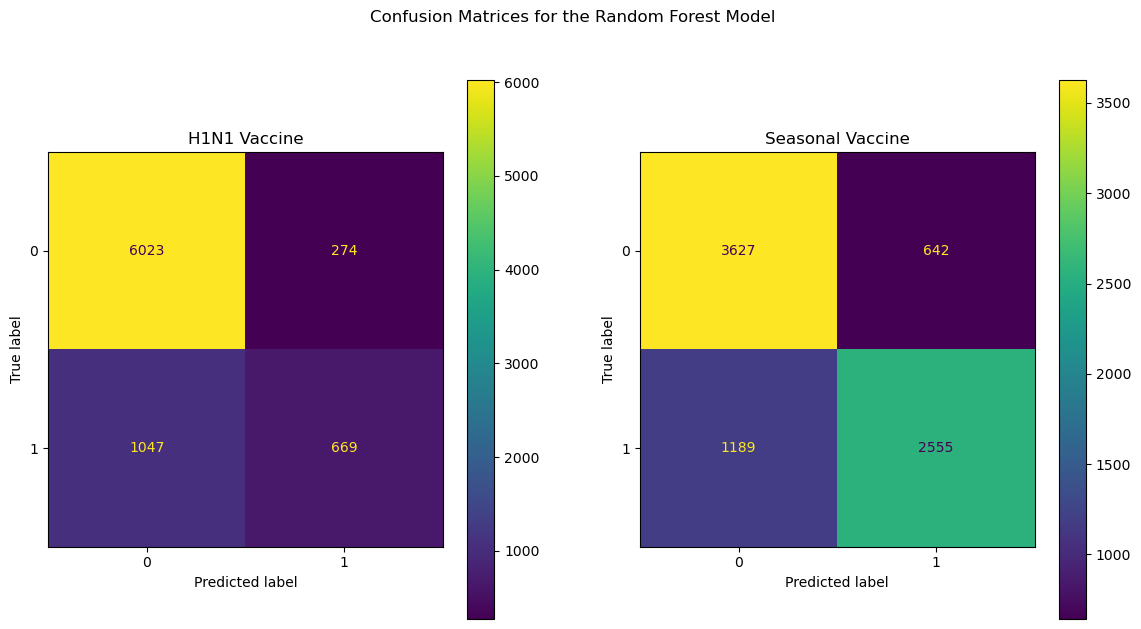

In [2283]:
# Confusion Matrix for Random Forest 
predictions = forest_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for the Random Forest Model')
plt.show()

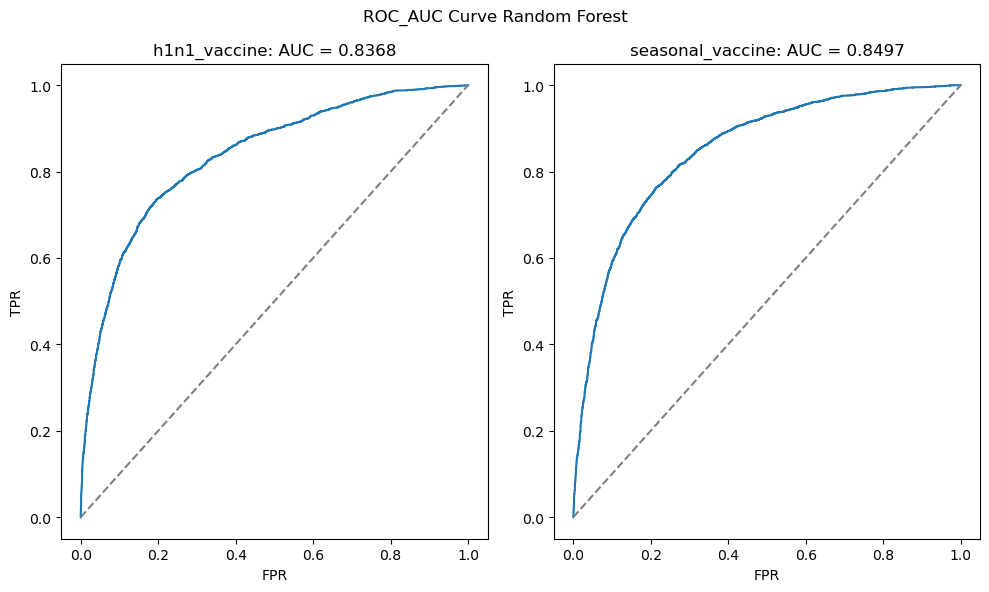

In [2284]:
#ROC_AUC Curve for Random Forest
y_preds = forest_grid.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle(f"ROC_AUC Curve Random Forest")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

### XGBoost

Daniel Abreu Contribution

In [2286]:
# Define a ClassifierChain that applies multiple classifiers in a chain
# The chain includes feature selection, scaling, and an XGBoost classifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif),
#StandardScaler(),
MinMaxScaler(),
#RobustScaler(),
XGBClassifier(use_label_encoder=False, verbosity=0, n_jobs=1)))

# Create a pipeline that combines preprocessing and the classifier chain
xgb_pipe = make_pipeline(default_preprocessor, chain)

xgb_pipe

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('boolean_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',...
                                                                               gpu_id=None,
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=None,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=None,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               n_estimators=100,
                                                                               n_jobs=1,
                                                                               num_parallel_tree=None,
                                                                               predictor=None,
                                                                               random_state=None, ...))])))])

In [2287]:

params = {
    'classifierchain__base_estimator__selectpercentile__percentile': [10, 50, 90],
    'classifierchain__base_estimator__xgbclassifier__n_estimators': [100, 200, 500],
    'classifierchain__base_estimator__xgbclassifier__max_depth': list(range(1, 6)),
    'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1, 0.2],
    'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1, 0.2, 0.3],
    'classifierchain__order': [[0, 1], [1, 0]]
}


best_xgb_params = {
    'classifierchain__base_estimator__selectpercentile__percentile': [90],
    'classifierchain__base_estimator__xgbclassifier__n_estimators': [200],
    'classifierchain__base_estimator__xgbclassifier__max_depth': [3],
    'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1],
    'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1],
    'classifierchain__order': [[0, 1]]
}


#xgb_grid = RandomizedSearchCV(xgb_pipe, params, scoring='roc_auc', n_iter=280, verbose=1, n_jobs=-1)

# Perform randomized search for hyperparameter tuning on the xgb_pipe pipeline
# The search is based on the defined parameter grid (best_xgb_params)
# The scoring metric used is 'roc_auc' 
# The n_iter parameter specifies the number of parameter settings that are sampled from the parameter grid
# The verbose parameter controls the verbosity of the output during the search
# The n_jobs parameter specifies the number of CPU cores to use (-1 means using all available cores)
xgb_grid = RandomizedSearchCV(xgb_pipe, best_xgb_params, scoring='roc_auc', n_iter=1, verbose=1, n_jobs=-1)

#xgb_grid = RandomizedSearchCV(xgb_pipe, best_xgb_params, scoring='accuracy_score', n_iter=1, verbose=1, n_jobs=-1)

# Fit the xgb_grid randomized search object to the training data
xgb_grid.fit(X_train, Y_train.astype(int))

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('boolean_imputer',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_to...
                   param_distributions={'classifierchain__base_estimator__selectpercentile__percentile': [90],
                                        'classifierchain__base_estimator__xgbclassifier__learning_rate': [0.1],
                                        'classifierchain__base_estimator__xgbclassifier__max_depth': [3],
                                        'classifierchain__base_estimator__xgbclassifier__n_estimators': [200],
                                        'classifierchain__base_estimator__xgbclassifier__reg_lambda': [0.1],
                                        'classifierchain__order': [[0, 1]]},
                   scoring='roc_auc', verbose=1)

In [2288]:
# Best parameters for the model
display(xgb_grid.best_params_)

#{'classifierchain__order': [0, 1],
# 'classifierchain__base_estimator__xgbclassifier__reg_lambda': 0.1,
# 'classifierchain__base_estimator__xgbclassifier__n_estimators': 100,
# 'classifierchain__base_estimator__xgbclassifier__max_depth': 4,
# 'classifierchain__base_estimator__xgbclassifier__learning_rate': 0.1,
# 'classifierchain__base_estimator__selectpercentile__percentile': 90}

{'classifierchain__order': [0, 1],
 'classifierchain__base_estimator__xgbclassifier__reg_lambda': 0.1,
 'classifierchain__base_estimator__xgbclassifier__n_estimators': 200,
 'classifierchain__base_estimator__xgbclassifier__max_depth': 3,
 'classifierchain__base_estimator__xgbclassifier__learning_rate': 0.1,
 'classifierchain__base_estimator__selectpercentile__percentile': 90}

In [2289]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(xgb_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(xgb_grid.score(X_test, Y_test)))

Best model in-sample score: 0.8610
Best model out-of-sample score: 0.8499


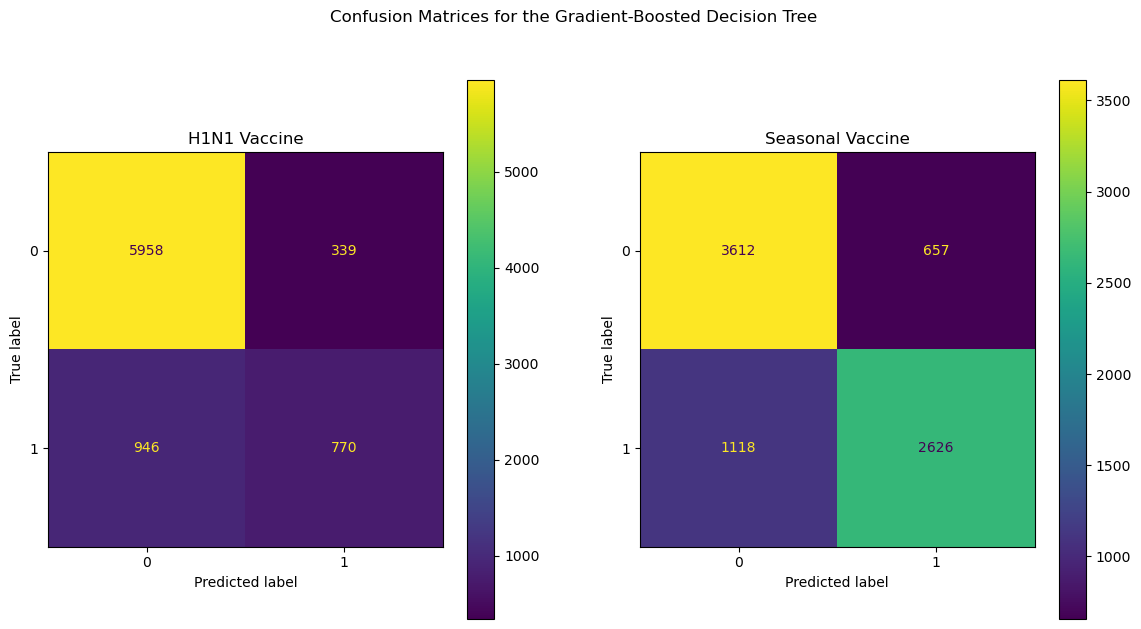

In [2290]:
# Display confusion matrices for the XGBoost Model

from sklearn.metrics import ConfusionMatrixDisplay

predictions = xgb_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for the Gradient-Boosted Decision Tree')
plt.show()

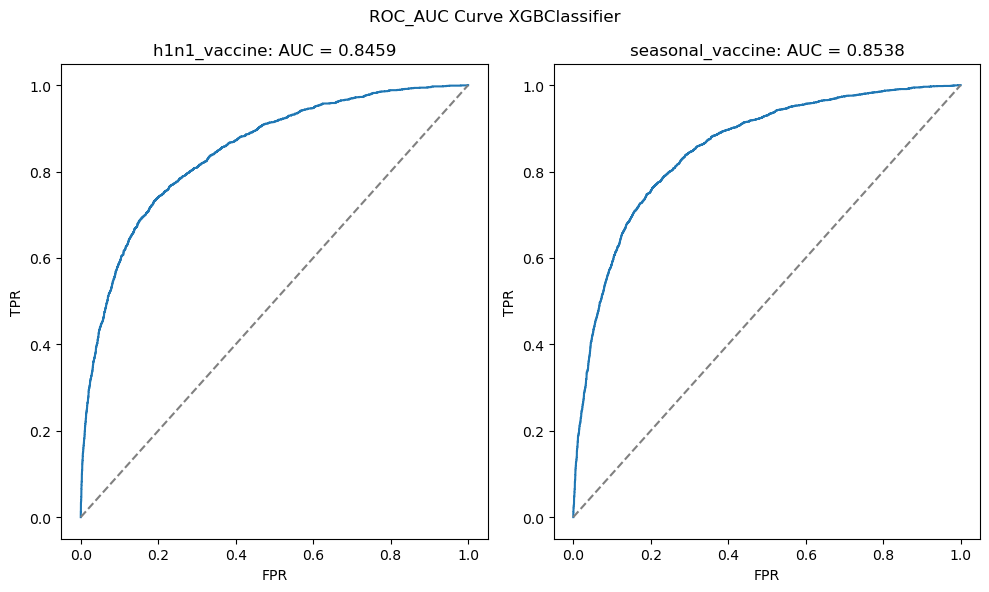

In [2292]:
# Display the ROC_AUC curve for the XGBoost model
y_preds = xgb_grid.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle(f"ROC_AUC Curve XGBClassifier")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

### Multilabel K-Nearest Neighbour

Viktoria Stoeva Contribution

In [2293]:
# Define a ClassifierChain that applies multiple classifiers in a chain
# The chain includes feature selection, scaling, and a KNN classifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif),
#StandardScaler(), 
MinMaxScaler(),
#RobustScaler(),
KNeighborsClassifier()))

# Create a pipeline that combines preprocessing and the classifier chain
knn_pipe = make_pipeline(default_preprocessor, chain)

In [2294]:
# Finding the best parameters for the model
"""
params = {
    'classifierchain__base_estimator__kneighborsclassifier__n_neighbors': list(range(60, 160, 10)),
    'classifierchain__base_estimator__selectpercentile__percentile': [10, 20, 50],
    'classifierchain__base_estimator__kneighborsclassifier__weights': ['uniform', 'distance'],
    'classifierchain__base_estimator__kneighborsclassifier__p': [1, 2],
    'classifierchain__order': [[0,1], [1,0]]
}

"""
best_knn_params = {'classifierchain__order': [[0, 1]],
 'classifierchain__base_estimator__selectpercentile__percentile': [20],
 'classifierchain__base_estimator__kneighborsclassifier__weights': ['uniform'],
 'classifierchain__base_estimator__kneighborsclassifier__p': [1],
 'classifierchain__base_estimator__kneighborsclassifier__n_neighbors': [150]}


#KNN_Grid = RandomizedSearchCV(KNN_pipe, params, scoring='roc_auc', n_iter = 160, verbose=1, n_jobs=-1)



# Perform randomized search for hyperparameter tuning on the knn_pipe pipeline
# The search is based on the defined parameter grid (best_knn_params)
# The scoring metric used is 'roc_auc' 
# The n_iter parameter specifies the number of parameter settings that are sampled from the parameter grid
# The verbose parameter controls the verbosity of the output during the search
# The n_jobs parameter specifies the number of CPU cores to use (-1 means using all available cores)
knn_grid = RandomizedSearchCV(knn_pipe, best_knn_params, scoring='roc_auc', n_iter = 1, verbose=1, n_jobs=-1)

#knn_grid = RandomizedSearchCV(knn_pipe, best_knn_params, scoring='accuracy_score', n_iter = 1, verbose=1, n_jobs=-1)


# Fit the knn_grid randomized search object to the training data
knn_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('boolean_imputer',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_to...
                   param_distributions={'classifierchain__base_estimator__kneighborsclassifier__n_neighbors': [150],
                                        'classifierchain__base_estimator__kneighborsclassifier__p': [1],
                                        'classifierchain__base_estimator__kneighborsclassifier__weights': ['uniform'],
                                        'classifierchain__base_estimator__selectpercentile__percentile': [20],
                                        'classifierchain__order': [[0, 1]]},
                   scoring='roc_auc', verbose=1)

In [2197]:
# Best parameters for the model
#display(knn_Grid.best_params_)
""" 
{'classifierchain__order': [0, 1],
 'classifierchain__base_estimator__selectpercentile__percentile': 20,
 'classifierchain__base_estimator__kneighborsclassifier__weights': 'uniform',
 'classifierchain__base_estimator__kneighborsclassifier__p': 1,
 'classifierchain__base_estimator__kneighborsclassifier__n_neighbors': 150}
"""

" \n{'classifierchain__order': [0, 1],\n 'classifierchain__base_estimator__selectpercentile__percentile': 20,\n 'classifierchain__base_estimator__kneighborsclassifier__weights': 'uniform',\n 'classifierchain__base_estimator__kneighborsclassifier__p': 1,\n 'classifierchain__base_estimator__kneighborsclassifier__n_neighbors': 150}\n"

In [2198]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(knn_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(knn_grid.score(X_test, Y_test)))

Best model in-sample score: 0.8327
Best model out-of-sample score: 0.8263


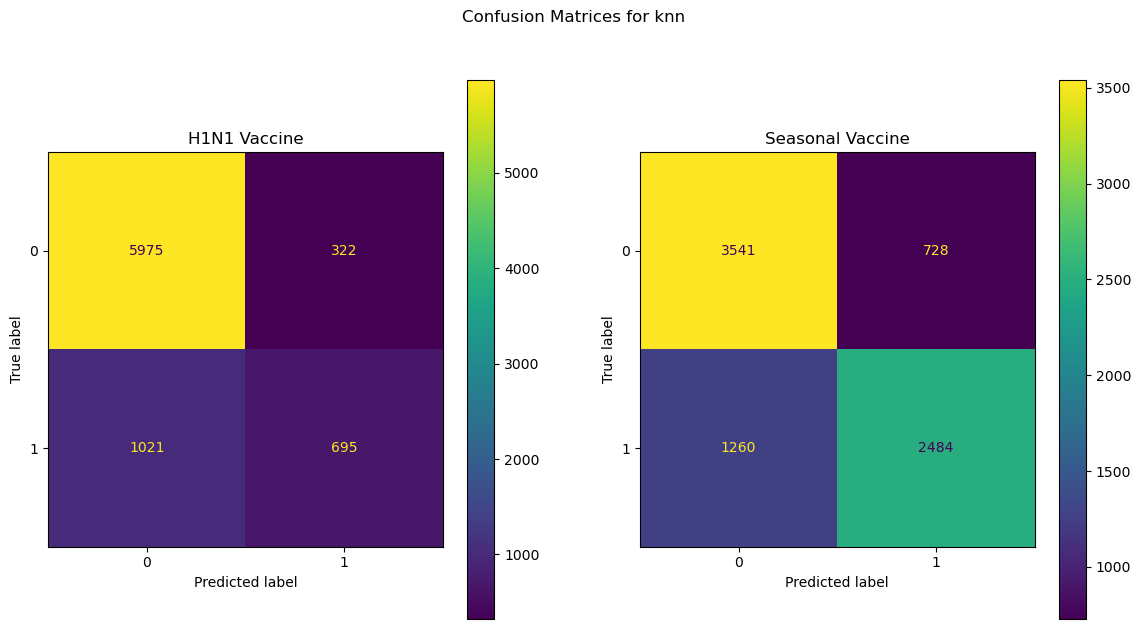

In [2295]:
# Display confusion matrices for the KNN Model

from sklearn.metrics import ConfusionMatrixDisplay

predictions = knn_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for KNN')
plt.show()

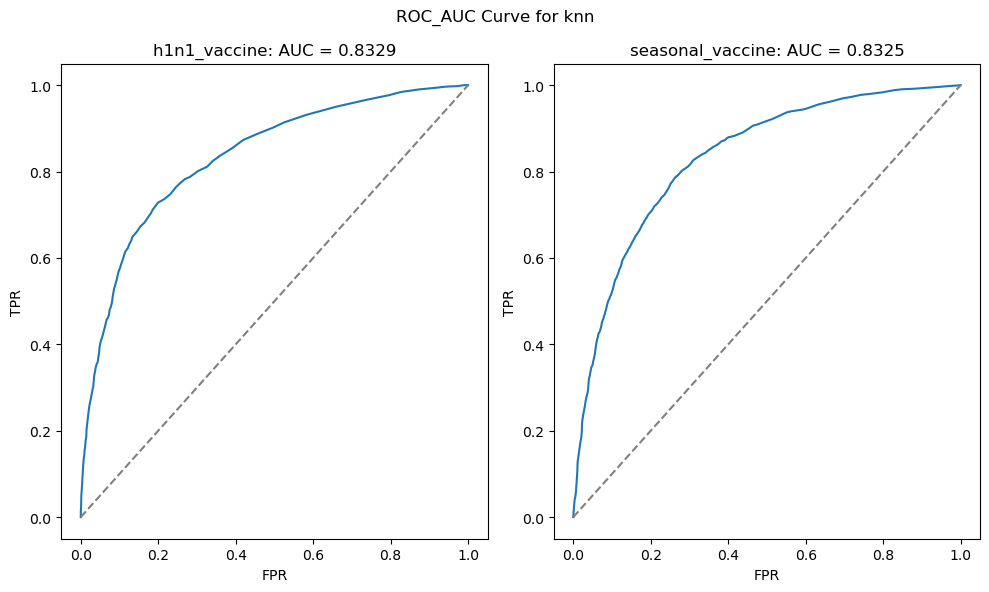

In [2296]:
#Display ROC_AUC Curve for KNN
y_preds = knn_grid.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle(f"ROC_AUC Curve for knn")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

### Naive Bayes

Daniel Abreu Contribution

In [2299]:
# Define a ClassifierChain that applies multiple classifiers in a chain
# The chain includes feature selection, scaling, and a Gaussian Naive Bayes classifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif),
#StandardScaler(),
MinMaxScaler(),
#RobustScaler(),
GaussianNB()))

# Create a pipeline that combines preprocessing and the classifier chain
naive_bayes_pipe = make_pipeline(default_preprocessor, chain)

# Fit the naive_bayes_pipe pipeline to the training data
naive_bayes_pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('boolean_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'behavioral_outside_home',
                                                   'behavioral_touch_face',
                                                   'doctor_recc_h1n1',...
                                                                                 sparse_output=False))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'employment_status',
                                                   'hhs_geo_region',
                                                   'census_msa',
                                                   'rent_or_own'])])),
                ('classifierchain',
                 ClassifierChain(base_estimator=Pipeline(steps=[('selectpercentile',
                                                                 SelectPercentile(score_func=<function mutual_info_classif at 0x0000017C26053010>)),
                                                                ('minmaxscaler',
                                                                 MinMaxScaler()),
                                                                ('gaussiannb',
                                                                 GaussianNB())])))])

In [2300]:
# Score for best model, using test data
print('Best model in-sample score: {:.4f}'.format(naive_bayes_pipe.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(naive_bayes_pipe.score(X_test, Y_test)))

Best model in-sample score: 0.6300
Best model out-of-sample score: 0.6356


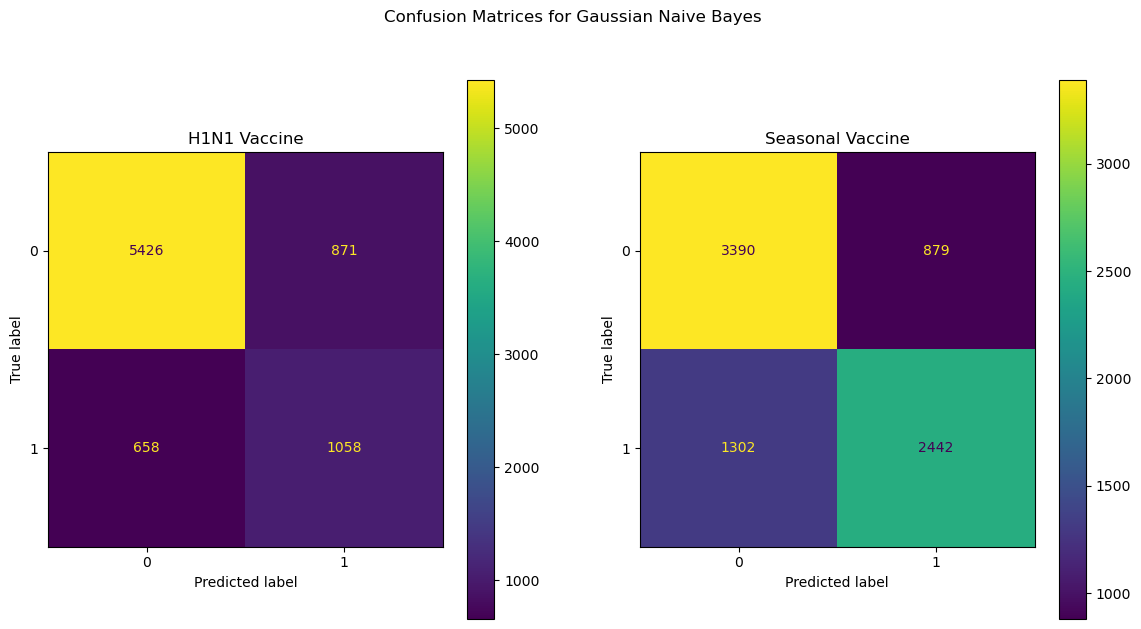

In [2301]:
# Display confusion matrices for the Naive Bayes Model
from sklearn.metrics import ConfusionMatrixDisplay

predictions = naive_bayes_pipe.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for Gaussian Naive Bayes')
plt.show()

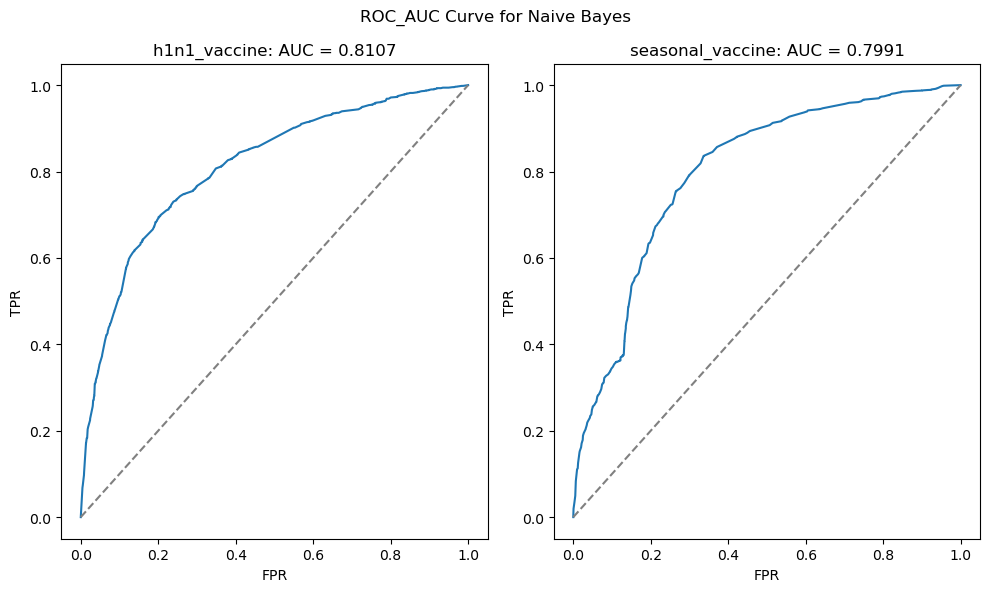

In [2302]:
#Display the ROC_AUC Curve for the Naive Bayes Model
y_preds = naive_bayes_pipe.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle(f"ROC_AUC Curve for Naive Bayes")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

### CatBoost

Daniel Abreu and Viktoria Stoeva Contribution

In [2303]:
# Define a ClassifierChain that applies multiple classifiers in a chain
# The chain includes feature selection, scaling, and a CatBoost classifier
chain = ClassifierChain(make_pipeline(SelectPercentile(mutual_info_classif),
#StandardScaler(),
MinMaxScaler(),
#RobustScaler(),
CatBoostClassifier()))

# Create a pipeline that combines preprocessing and the classifier chain
catboost_pipe = make_pipeline(default_preprocessor, chain)

#Finding the best parameters for CatBoost

cat_params = {
        'classifierchain__base_estimator__catboostclassifier__iterations': [100,200,300,500,1000,1200,1500],
        'classifierchain__base_estimator__catboostclassifier__learning_rate': (0.001, 0.3),
        'classifierchain__base_estimator__catboostclassifier__random_strength': (1,10),
        'classifierchain__base_estimator__catboostclassifier__bagging_temperature': (0,10),
        'classifierchain__base_estimator__catboostclassifier__max_bin': [4,5,6,8,10,20,30],
        'classifierchain__base_estimator__catboostclassifier__grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
        'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': (1,10),
        'classifierchain__base_estimator__catboostclassifier__od_type' : ["Iter"],
        'classifierchain__base_estimator__catboostclassifier__od_wait' : [100],
        'classifierchain__base_estimator__catboostclassifier__max_depth': (2,10),
        'classifierchain__base_estimator__catboostclassifier__l2_leaf_reg': (1e-8, 100),
        'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': [5,10,12,100,500,1024],
        'classifierchain__base_estimator__catboostclassifier__custom_metric': ['AUC'],
        'classifierchain__base_estimator__catboostclassifier__loss_function': ["Logloss"],
        'classifierchain__base_estimator__catboostclassifier__auto_class_weights': ['Balanced', 'SqrtBalanced']
    }


best_cat_params = {'classifierchain__base_estimator__catboostclassifier__random_strength': [4],
 'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': [10],
 'classifierchain__base_estimator__catboostclassifier__od_wait': [100],
 'classifierchain__base_estimator__catboostclassifier__od_type': ['Iter'],
 'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': [7],
 'classifierchain__base_estimator__catboostclassifier__max_depth': [6],
 'classifierchain__base_estimator__catboostclassifier__max_bin': [5],
 'classifierchain__base_estimator__catboostclassifier__loss_function': ['Logloss'],
 'classifierchain__base_estimator__catboostclassifier__learning_rate': [0.058],
 'classifierchain__base_estimator__catboostclassifier__l2_leaf_reg': [12],
 'classifierchain__base_estimator__catboostclassifier__iterations': [500],
 'classifierchain__base_estimator__catboostclassifier__grow_policy': ['Lossguide'],
 'classifierchain__base_estimator__catboostclassifier__custom_metric': ['AUC'],
 'classifierchain__base_estimator__catboostclassifier__bagging_temperature': [8],
 'classifierchain__base_estimator__catboostclassifier__auto_class_weights': ['SqrtBalanced']}

#catboost_grid = RandomizedSearchCV(catboost_pipe, cat_params, scoring='roc_auc', n_jobs = 260, verbose=False, n_jobs=-1)

# Create a randomized search object for hyperparameter tuning
catboost_grid = RandomizedSearchCV(catboost_pipe, best_cat_params, scoring='roc_auc', n_iter = 1, verbose=False, n_jobs=-1)

#catboost_grid = RandomizedSearchCV(catboost_pipe, best_cat_params, scoring='accuracy_score', n_iter = 1, verbose=False, n_jobs=-1)


catboost_grid.fit(X_train, Y_train)

0:	learn: 0.6687012	total: 242ms	remaining: 2m
1:	learn: 0.6491527	total: 457ms	remaining: 1m 53s
2:	learn: 0.6299782	total: 675ms	remaining: 1m 51s
3:	learn: 0.6127677	total: 884ms	remaining: 1m 49s
4:	learn: 0.6020551	total: 1.07s	remaining: 1m 45s
5:	learn: 0.5887217	total: 1.25s	remaining: 1m 43s
6:	learn: 0.5780238	total: 1.41s	remaining: 1m 39s
7:	learn: 0.5685047	total: 1.57s	remaining: 1m 36s
8:	learn: 0.5594811	total: 1.75s	remaining: 1m 35s
9:	learn: 0.5536913	total: 1.95s	remaining: 1m 35s
10:	learn: 0.5469097	total: 2.16s	remaining: 1m 35s
11:	learn: 0.5403145	total: 2.32s	remaining: 1m 34s
12:	learn: 0.5351734	total: 2.49s	remaining: 1m 33s
13:	learn: 0.5309464	total: 2.66s	remaining: 1m 32s
14:	learn: 0.5262779	total: 2.82s	remaining: 1m 31s
15:	learn: 0.5221905	total: 2.98s	remaining: 1m 30s
16:	learn: 0.5189671	total: 3.16s	remaining: 1m 29s
17:	learn: 0.5160694	total: 3.35s	remaining: 1m 29s
18:	learn: 0.5132535	total: 3.52s	remaining: 1m 29s
19:	learn: 0.5111145	total

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('boolean_imputer',
                                                                               SimpleImputer(strategy='most_frequent'),
                                                                               ['behavioral_antiviral_meds',
                                                                                'behavioral_avoidance',
                                                                                'behavioral_face_mask',
                                                                                'behavioral_wash_hands',
                                                                                'behavioral_large_gatherings',
                                                                                'behavioral_outside_home',
                                                                                'behavioral_to...
                                        'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': [7],
                                        'classifierchain__base_estimator__catboostclassifier__od_type': ['Iter'],
                                        'classifierchain__base_estimator__catboostclassifier__od_wait': [100],
                                        'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': [10],
                                        'classifierchain__base_estimator__catboostclassifier__random_strength': [4]},
                   scoring='roc_auc', verbose=False)

In [2304]:
#Displays the best catboost parameters found
display(catboost_grid.best_params_)

""" 
{'classifierchain__base_estimator__catboostclassifier__random_strength': 1,
 'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': 1024,
 'classifierchain__base_estimator__catboostclassifier__od_wait': 100,
 'classifierchain__base_estimator__catboostclassifier__od_type': 'Iter',
 'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': 1,
 'classifierchain__base_estimator__catboostclassifier__max_depth': 2,
 'classifierchain__base_estimator__catboostclassifier__max_bin': 30,
 'classifierchain__base_estimator__catboostclassifier__loss_function': 'Logloss',
 'classifierchain__base_estimator__catboostclassifier__learning_rate': 0.3,
 'classifierchain__base_estimator__catboostclassifier__l2_leaf_reg': 100,
 'classifierchain__base_estimator__catboostclassifier__iterations': 100,
 'classifierchain__base_estimator__catboostclassifier__grow_policy': 'Lossguide',
 'classifierchain__base_estimator__catboostclassifier__custom_metric': 'AUC',
 'classifierchain__base_estimator__catboostclassifier__bagging_temperature': 0,
 'classifierchain__base_estimator__catboostclassifier__auto_class_weights': 'SqrtBalanced'}
"""

{'classifierchain__base_estimator__catboostclassifier__random_strength': 4,
 'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': 10,
 'classifierchain__base_estimator__catboostclassifier__od_wait': 100,
 'classifierchain__base_estimator__catboostclassifier__od_type': 'Iter',
 'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': 7,
 'classifierchain__base_estimator__catboostclassifier__max_depth': 6,
 'classifierchain__base_estimator__catboostclassifier__max_bin': 5,
 'classifierchain__base_estimator__catboostclassifier__loss_function': 'Logloss',
 'classifierchain__base_estimator__catboostclassifier__learning_rate': 0.058,
 'classifierchain__base_estimator__catboostclassifier__l2_leaf_reg': 12,
 'classifierchain__base_estimator__catboostclassifier__iterations': 500,
 'classifierchain__base_estimator__catboostclassifier__grow_policy': 'Lossguide',
 'classifierchain__base_estimator__catboostclassifier__custom_metric': 'AUC',
 'classifierchain__bas

" \n{'classifierchain__base_estimator__catboostclassifier__random_strength': 1,\n 'classifierchain__base_estimator__catboostclassifier__one_hot_max_size': 1024,\n 'classifierchain__base_estimator__catboostclassifier__od_wait': 100,\n 'classifierchain__base_estimator__catboostclassifier__od_type': 'Iter',\n 'classifierchain__base_estimator__catboostclassifier__min_data_in_leaf': 1,\n 'classifierchain__base_estimator__catboostclassifier__max_depth': 2,\n 'classifierchain__base_estimator__catboostclassifier__max_bin': 30,\n 'classifierchain__base_estimator__catboostclassifier__loss_function': 'Logloss',\n 'classifierchain__base_estimator__catboostclassifier__learning_rate': 0.3,\n 'classifierchain__base_estimator__catboostclassifier__l2_leaf_reg': 100,\n 'classifierchain__base_estimator__catboostclassifier__iterations': 100,\n 'classifierchain__base_estimator__catboostclassifier__grow_policy': 'Lossguide',\n 'classifierchain__base_estimator__catboostclassifier__custom_metric': 'AUC',\n 'c

In [2306]:
#Display both in-sample and out-of sample scores
print('Best model in-sample score: {:.4f}'.format(catboost_grid.score(X_train, Y_train)))
print('Best model out-of-sample score: {:.4f}'.format(catboost_grid.score(X_test, Y_test)))

Best model in-sample score: 0.8279
Best model out-of-sample score: 0.8201


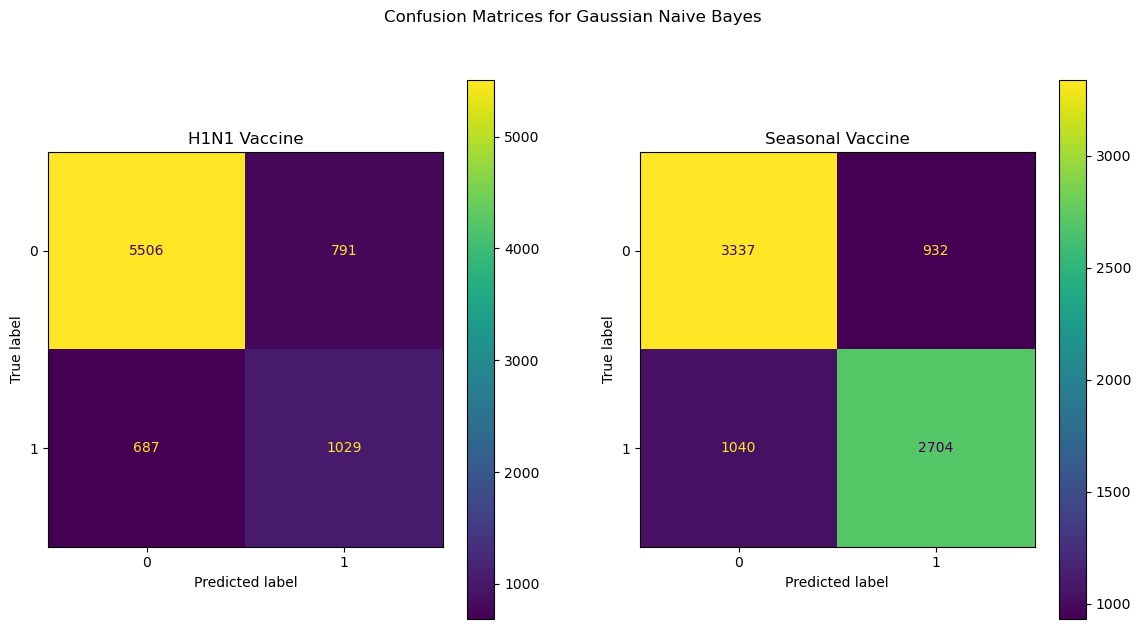

In [2307]:
# Display confusion matrices for the Catboost Model

from sklearn.metrics import ConfusionMatrixDisplay

predictions = catboost_grid.predict(X_test)

fig = plt.figure(figsize=(14, 7))
axs = fig.subplots(1, 2)
for i, col in enumerate(Y_test.columns):
    ConfusionMatrixDisplay.from_predictions(Y_test[col], predictions[:, i], ax=axs[i])
    axs[i].set_title(col.title().replace('_', ' '))
fig.suptitle('Confusion Matrices for CatBoost')
plt.show()

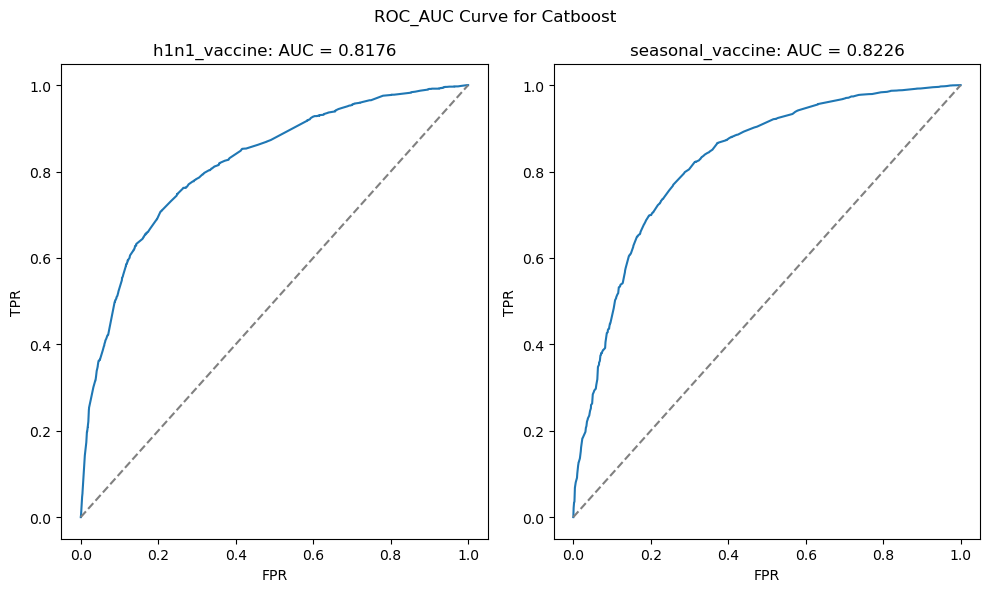

In [2308]:
#Displays the ROC_AUC Curve for the Catboost model
y_preds = catboost_grid.predict_proba(X_test)
y_preds_both = pd.DataFrame({"h1n1_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=Y_test.index)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.suptitle(f"ROC_AUC Curve for Catboost")

plot_roc(Y_test['h1n1_vaccine'], y_preds_both['h1n1_vaccine'], 'h1n1_vaccine',ax=ax[0])
plot_roc(Y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

## Model Comparison

In [2309]:
#Daniel Abreu Contribution

# Calculate the scores of the different models on the test data
Decision_Tree_Score = xgb_grid.score(X_test, Y_test)
Random_Forest_Score = forest_grid.score(X_test, Y_test)
Knn_Score = knn_grid.score(X_test, Y_test)
Naive_Bayes_Score = naive_bayes_pipe.score(X_test, Y_test)
Cat_Boost_Score = catboost_grid.score(X_test, Y_test)

# Create a list of the scores
accuracy_score = [Random_Forest_Score, Decision_Tree_Score, Knn_Score, Naive_Bayes_Score, Cat_Boost_Score]

# Create a list of the model names
models = ["Random Forest", "XGBoost", "KNN", "Naive Bayes", "CatBoost"]

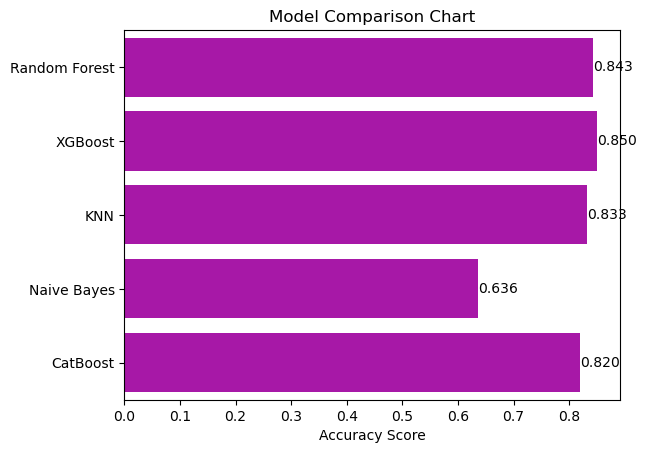

In [2310]:
#Viktoria Stoeva Contribution

# Create a bar plot with accuracy scores on the x-axis and model names on the y-axis
ax = sns.barplot(x=accuracy_score, y=models, color="m")

# Add labels to the bars displaying the accuracy scores with three decimal places
ax.bar_label(ax.containers[0], fmt='%.3f')

# Set the label for the x-axis
plt.xlabel('Accuracy Score')

# Set the label for the y-axis
plt.title('Model Comparison Chart')

#Display the plot
plt.show()

## Submission File

Pre-processing of testing features dataframe

In [2311]:
#Daniel Abreu and Viktoria Stoeva Contribution

def testing_preprocessing():
    # Read the test set features data from and set the "respondent_id" column as the index
    test_features_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")

    # Display the last 5 rows of the test features DataFrame
    test_features_df.tail()

    # Drop the columns "health_insurance", "employment_industry", and "employment_occupation" from the test features DataFrame
    test_features_df.drop(["health_insurance", "employment_industry", "employment_occupation"], axis = 1, inplace = True)

    # Return the preprocessed test features DataFrame
    return test_features_df

In [2214]:
#Daniel Abreu and Viktoria Stoeva Contribution

test_df = testing_preprocessing()

In [2312]:
#Daniel Abreu and Viktoria Stoeva Contribution

# Assign the best model found to the variable best_model
best_model = xgb_grid.best_estimator_

# Fit the best model to the features and labels data
best_model.fit(features, labels)

# Generate predictions for the test dataset using the best model and create a DataFrame with the predicted probabilities
comp_predictions = pd.DataFrame(best_model.predict_proba(test_df), index=test_df.index, columns=labels.columns)

# Save the predictions DataFrame to a CSV file
comp_predictions.to_csv('xgboost.csv')

# Display the first 10 rows of the predictions DataFrame
comp_predictions.head(10)

c:\Users\danie\anaconda3\envs\COMP4030\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707              0.089279          0.141825
26708              0.040936          0.028461
26709              0.457137          0.734100
26710              0.593907          0.944381
26711              0.216983          0.362244
26712              0.534258          0.982101
26713              0.396713          0.428890
26714              0.100706          0.067031
26715              0.040173          0.075415
26716              0.132780          0.831285